In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data understanding

In [3]:
#Read application_data.csv file into app dataframe
app = pd.read_csv("application_data.csv")
prev = pd.read_csv("previous_application.csv")

In [4]:
#Number of rows and columns in the dataframe
app.shape

(307511, 122)

In [5]:
#Describe the applicationd data
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
#List out all columns
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
#Verify data types of each column
app.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

# Data Cleaning and Manipulation

In [8]:
#Finding CODE_GENDER has incorrect value XNA for 4 rows
app.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [9]:
#updating XNA with Mode values for CODE_GENDER
app.CODE_GENDER= app["CODE_GENDER"].str.replace('/',' ')
app.CODE_GENDER = app.CODE_GENDER.replace('XNA','F')
app.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [10]:
#Finding columns having null values percentage above 50% and dropping them as those are not useful for analysis
#Printing all columns which are dropped.
for i in app.columns:
    percent=app[i].isna().mean().round(4)*100
    if percent>=50:
        print(i,app[i].isnull().sum(),percent)   
        app.drop(i,axis=1,inplace=True)


OWN_CAR_AGE 202929 65.99000000000001
EXT_SOURCE_1 173378 56.379999999999995
APARTMENTS_AVG 156061 50.74999999999999
BASEMENTAREA_AVG 179943 58.52
YEARS_BUILD_AVG 204488 66.5
COMMONAREA_AVG 214865 69.87
ELEVATORS_AVG 163891 53.300000000000004
ENTRANCES_AVG 154828 50.349999999999994
FLOORSMIN_AVG 208642 67.85
LANDAREA_AVG 182590 59.38
LIVINGAPARTMENTS_AVG 210199 68.35
LIVINGAREA_AVG 154350 50.19
NONLIVINGAPARTMENTS_AVG 213514 69.43
NONLIVINGAREA_AVG 169682 55.17999999999999
APARTMENTS_MODE 156061 50.74999999999999
BASEMENTAREA_MODE 179943 58.52
YEARS_BUILD_MODE 204488 66.5
COMMONAREA_MODE 214865 69.87
ELEVATORS_MODE 163891 53.300000000000004
ENTRANCES_MODE 154828 50.349999999999994
FLOORSMIN_MODE 208642 67.85
LANDAREA_MODE 182590 59.38
LIVINGAPARTMENTS_MODE 210199 68.35
LIVINGAREA_MODE 154350 50.19
NONLIVINGAPARTMENTS_MODE 213514 69.43
NONLIVINGAREA_MODE 169682 55.17999999999999
APARTMENTS_MEDI 156061 50.74999999999999
BASEMENTAREA_MEDI 179943 58.52
YEARS_BUILD_MEDI 204488 66.5
COMMONARE

In [11]:
#Verifying size after dropping columns in above steps
app.shape

(307511, 81)

In [12]:
#Finding columns having null values percentage between 15% to 50%
#OCCUPATION_TYPE, EXT_SOURCE_3 are having between 15% to 50%
for i in app.columns:
    percent=app[i].isna().mean().round(4)*100
    if percent>=15 and percent < 50:
        print(i,app[i].isnull().sum(),percent)       


OCCUPATION_TYPE 96391 31.35
EXT_SOURCE_3 60965 19.830000000000002
YEARS_BEGINEXPLUATATION_AVG 150007 48.78
FLOORSMAX_AVG 153020 49.76
YEARS_BEGINEXPLUATATION_MODE 150007 48.78
FLOORSMAX_MODE 153020 49.76
YEARS_BEGINEXPLUATATION_MEDI 150007 48.78
FLOORSMAX_MEDI 153020 49.76
TOTALAREA_MODE 148431 48.27
EMERGENCYSTATE_MODE 145755 47.4


In [13]:
app.EXT_SOURCE_3 = app.EXT_SOURCE_3.replace(np.nan,app.EXT_SOURCE_3.median())
app.EXT_SOURCE_3 = round(app.EXT_SOURCE_3 ,2)
app.EXT_SOURCE_3.isnull().sum()

0

In [14]:
#updating null values with Mode values for coulmns OCCUPATION_TYPE,EXT_SOURCE_3
app.OCCUPATION_TYPE = app.OCCUPATION_TYPE.replace(np.nan,"Unknown")
app.OCCUPATION_TYPE.isnull().sum()
app.OCCUPATION_TYPE.value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [15]:
#Finding columns having null values percentage below 15% 
#No action done for these columns. Will consider when necessary
for i in app.columns:
    tot=(app[i].isnull().sum()/app[i].index.size)*100
    if tot > 0 and tot < 15:
        print(i,app[i].isnull().sum(),tot)




AMT_ANNUITY 12 0.003902299429939092
AMT_GOODS_PRICE 278 0.09040327012692229
NAME_TYPE_SUITE 1292 0.42014757195677555
CNT_FAM_MEMBERS 2 0.0006503832383231819
EXT_SOURCE_2 660 0.21462646864665005
OBS_30_CNT_SOCIAL_CIRCLE 1021 0.3320206431639844
DEF_30_CNT_SOCIAL_CIRCLE 1021 0.3320206431639844
OBS_60_CNT_SOCIAL_CIRCLE 1021 0.3320206431639844
DEF_60_CNT_SOCIAL_CIRCLE 1021 0.3320206431639844
DAYS_LAST_PHONE_CHANGE 1 0.00032519161916159093
AMT_REQ_CREDIT_BUREAU_HOUR 41519 13.501630835970097
AMT_REQ_CREDIT_BUREAU_DAY 41519 13.501630835970097
AMT_REQ_CREDIT_BUREAU_WEEK 41519 13.501630835970097
AMT_REQ_CREDIT_BUREAU_MON 41519 13.501630835970097
AMT_REQ_CREDIT_BUREAU_QRT 41519 13.501630835970097
AMT_REQ_CREDIT_BUREAU_YEAR 41519 13.501630835970097


In [16]:
#Convert DAYS_ID_PUBLISH to absolute values
app['DAYS_ID_PUBLISH']= app['DAYS_ID_PUBLISH'].abs()
app['DAYS_EMPLOYED'] = app['DAYS_EMPLOYED'].abs()

In [17]:
#Convert DAYS_EMPLOYED to years by adding a new column YEARS_EMPLOYED
app['YEARS_EMPLOYED']=app['DAYS_EMPLOYED']/365
app.drop('DAYS_EMPLOYED', axis=1, inplace=True)

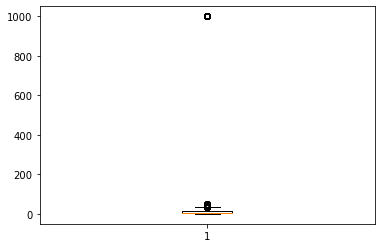

In [18]:

plt.boxplot(app.YEARS_EMPLOYED)
plt.show()

In [19]:
app.YEARS_EMPLOYED.describe()

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: YEARS_EMPLOYED, dtype: float64

- There is an outlier where the value is 1000 which is humanly impossible.

In [20]:
app[app.YEARS_EMPLOYED < 70].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_EMPLOYED
count,252137.000000,252137.000000,252137.000000,2.521370e+05,2.521370e+05,252125.000000,2.518810e+05,252137.000000,252137.000000,252137.000000,...,252137.000000,252137.000000,252137.000000,218281.000000,218281.000000,218281.000000,218281.000000,218281.000000,218281.000000,252137.000000
mean,278114.643103,0.086600,0.498515,1.759141e+05,6.113985e+05,27812.325168,5.494057e+05,0.020894,-14769.133174,-4635.430849,...,0.000710,0.000615,0.000409,0.006588,0.006977,0.034071,0.282003,0.259812,1.856277,6.531971
std,102815.635309,0.281248,0.763161,2.588516e+05,4.065272e+05,14647.759104,3.732685e+05,0.013874,3662.573769,3252.169156,...,0.026635,0.024786,0.020207,0.085093,0.111020,0.202825,0.948367,0.823679,1.826298,6.406466
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.050000e+04,0.000290,-25200.000000,-22928.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189035.000000,0.000000,0.000000,1.125000e+05,2.779695e+05,17073.000000,2.475000e+05,0.010006,-17563.000000,-6952.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.101370
50%,278064.000000,0.000000,0.000000,1.575000e+05,5.212800e+05,25834.500000,4.500000e+05,0.018850,-14573.000000,-4265.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.515068
75%,367165.000000,0.000000,1.000000,2.115000e+05,8.292240e+05,35617.500000,6.930000e+05,0.028663,-11775.000000,-1845.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,8.698630
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,0.000000,...,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,23.000000,49.073973


In [21]:
app.shape

(307511, 81)

In [22]:
app[app.YEARS_EMPLOYED > 70]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_EMPLOYED
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1000.665753
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,1000.665753
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,1000.665753
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,1000.665753
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,1000.665753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1000.665753
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0,1000.665753
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,8.0,1000.665753
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,...,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0,1000.665753


In [23]:
#Percentage of rows with YEARS_EMPLOYED greater than 70
(55374/307511)*100

18.00716071945394

In [24]:
#Replace the values of the outliers with NaN value
#app.YEARS_EMPLOYED = np.where(app.YEARS_EMPLOYED > 50, np.median, app.YEARS_EMPLOYED) 

app.loc[app['YEARS_EMPLOYED'] > 50, 'YEARS_EMPLOYED'] = np.nan

In [25]:
app.YEARS_EMPLOYED.value_counts()

0.547945     156
0.613699     152
0.630137     151
0.545205     151
0.580822     150
            ... 
29.452055      1
40.408219      1
34.950685      1
41.252055      1
27.435616      1
Name: YEARS_EMPLOYED, Length: 12573, dtype: int64

In [26]:
#convert DAYS_BIRTH TO AGE in years and drop column DAYS_BIRTH
app['AGE']=round(app['DAYS_BIRTH'] * -0.002738).astype(int) #convert to int
app['AGE'].head()
app = app.drop(['DAYS_BIRTH'],axis=1)

In [27]:
#Change the negative values to absolute value in DAYS_LAST_PHONE_CHANGE
app.DAYS_LAST_PHONE_CHANGE = app.DAYS_LAST_PHONE_CHANGE.abs()

#Convert FLAG_EMP_PHONE to categorical dtype
app.FLAG_EMP_PHONE = app.FLAG_EMP_PHONE.astype(object)

#Convert REG_REGION_NOT_LIVE_REGION to object dtype
app.REG_REGION_NOT_LIVE_REGION = app.REG_REGION_NOT_LIVE_REGION.astype(object)

#Convert FLAG_DOCUMENT_3 to object type
app.FLAG_DOCUMENT_3 = app.FLAG_DOCUMENT_3.astype(object)

#Convert REG_CITY_NOT_LIVE_CITY to object dtype
app.REG_CITY_NOT_LIVE_CITY = app.REG_CITY_NOT_LIVE_CITY.astype(object)

#Convert REGION_RATING_CLIENT_W_CITY to object dtype
app.REGION_RATING_CLIENT_W_CITY = app.REGION_RATING_CLIENT_W_CITY.astype(object)

#Convert REGION_RATING_CLIENT to object type
app.REGION_RATING_CLIENT = app.REGION_RATING_CLIENT.astype(object)

#Convert REG_CITY_NOT_WORK_CITY to object type
app.REG_CITY_NOT_WORK_CITY = app.REG_CITY_NOT_WORK_CITY.astype(object)

In [28]:
app.FLAG_MOBIL.value_counts(normalize=True)

1    0.999997
0    0.000003
Name: FLAG_MOBIL, dtype: float64

In [29]:
app.FLAG_CONT_MOBILE.value_counts(normalize=True)

1    0.998133
0    0.001867
Name: FLAG_CONT_MOBILE, dtype: float64

In [30]:
# Impute unknown values for family status with mode value
app.NAME_FAMILY_STATUS = app.NAME_FAMILY_STATUS.replace('Unknown','Married')

## Read and clean previous application dataframe

In [31]:
#Read previous application into a dataframe
prev_app = pd.read_csv("previous_application.csv")

In [32]:
#Display first 5 rows
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [34]:
## Data Cleaning

#Find columns with >50% missing values
prev_missing = prev_app.count()/len(prev_app)
prev_missing = (1-prev_missing)*100
prev_missing[prev_missing>50]

AMT_DOWN_PAYMENT            53.636480
RATE_DOWN_PAYMENT           53.636480
RATE_INTEREST_PRIMARY       99.643698
RATE_INTEREST_PRIVILEGED    99.643698
dtype: float64

In [35]:
prev_app.shape

(1670214, 37)

In [36]:
#Drop columns with > 50% missing values
prev_app = prev_app.drop(['AMT_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIVILEGED','NAME_TYPE_SUITE'],axis=1)

In [37]:
prev_app.shape

(1670214, 32)

### Handling Missing values in Previous Application

In [38]:
#Drop SK_ID_PREV since it is of no use for our analysis
prev_app = prev_app.drop('SK_ID_PREV', axis=1)

In [39]:
prev_app.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [40]:
#Drop rows with values XNA for NAME_CONTRACT_TYPE since it is negligible
prev_app.NAME_CONTRACT_TYPE.value_counts()

prev_app = prev_app[~(prev_app.NAME_CONTRACT_TYPE=='XNA')]

<AxesSubplot:>

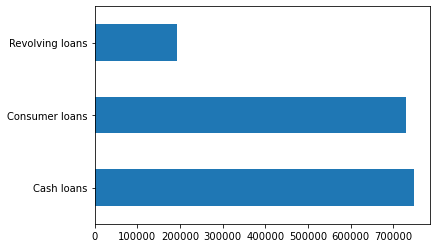

In [41]:
prev_app.NAME_CONTRACT_TYPE.value_counts().plot.barh()

<AxesSubplot:>

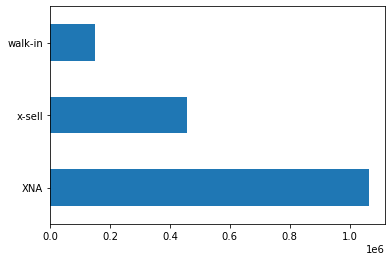

In [42]:
prev_app.NAME_PRODUCT_TYPE.value_counts().plot.barh()

<AxesSubplot:>

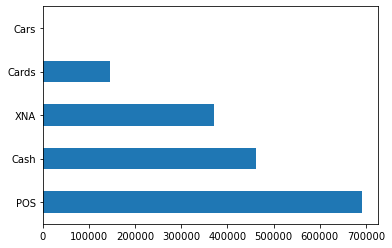

In [43]:
prev_app.NAME_PORTFOLIO.value_counts().plot.barh()

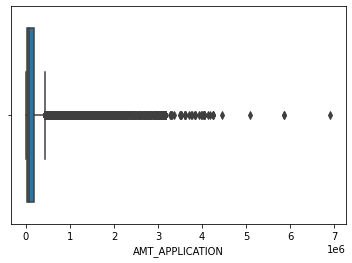

In [44]:
#Box plot for the amount requested by the client in the previous application

sns.boxplot(prev_app.AMT_APPLICATION)
plt.show()


In [45]:
#print the quantile (0.25, 0.5, 0.7, 0.9, 0.95 and 0.99) of AMT_APPLICATION variable of prev_app
prev_app.AMT_APPLICATION.quantile([0.25, 0.5, 0.7, 0.9, 0.95, 0.99])


0.25      18796.5
0.50      71055.0
0.70     144832.5
0.90     450000.0
0.95     787500.0
0.99    1350000.0
Name: AMT_APPLICATION, dtype: float64

In [46]:
# Make DAYS_DECISION absolute
prev_app.DAYS_DECISION = prev_app.DAYS_DECISION.abs()


## Merge Previous and Current Application dataframes 

In [47]:
inp0 = pd.merge(left=app,right=prev_app, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [48]:
inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=111)

In [49]:
#Drop the SK_ID_CURR column

inp0 = inp0.drop('SK_ID_CURR', axis=1)

In [50]:
inp0.shape

(1429842, 110)

## Segmented Analysis

In [51]:
#Check the proportion of TARGET variable
inp0.TARGET.value_counts(normalize=True)

0    0.913783
1    0.086217
Name: TARGET, dtype: float64

- The data is highly imbalanced with a majority of clients with other cases and only 8-9% of defaulters.

In [52]:
#Segment the data frames based on the TARGET variable
inp_def = inp0[inp0.TARGET == 1]
inp_other = inp0[inp0.TARGET == 0]

In [53]:
#Drop the TARGET columns in the dataframes

inp_def = inp_def.drop("TARGET", axis=1)
inp_other = inp_other.drop("TARGET", axis=1)

In [54]:
inp_def.columns

Index(['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=109)

In [55]:
# Finding top 20 columns correlation with TARGET variable
corr= inp0.corr()['TARGET'].sort_values(ascending=False)
print('Positive Correlations:\n', corr.head(20))
print('Negative Correlations:\n', corr.tail(20))


Positive Correlations:
 TARGET                         1.000000
DAYS_REGISTRATION              0.042701
LIVE_CITY_NOT_WORK_CITY        0.032776
DEF_30_CNT_SOCIAL_CIRCLE       0.032098
CNT_PAYMENT                    0.030480
DEF_60_CNT_SOCIAL_CIRCLE       0.028756
FLAG_WORK_PHONE                0.028285
CNT_CHILDREN                   0.020325
DAYS_LAST_DUE_1ST_VERSION      0.018021
AMT_REQ_CREDIT_BUREAU_YEAR     0.017604
DAYS_LAST_DUE                  0.017522
DAYS_TERMINATION               0.016981
CNT_FAM_MEMBERS                0.014832
OBS_30_CNT_SOCIAL_CIRCLE       0.014059
OBS_60_CNT_SOCIAL_CIRCLE       0.013938
FLAG_DOCUMENT_2                0.009945
REG_REGION_NOT_WORK_REGION     0.006568
AMT_REQ_CREDIT_BUREAU_DAY      0.004909
LIVE_REGION_NOT_WORK_REGION    0.003872
FLAG_DOCUMENT_20               0.002670
Name: TARGET, dtype: float64
Negative Correlations:
 AMT_ANNUITY_y                -0.014922
FLAG_PHONE                   -0.021334
HOUR_APPR_PROCESS_START_x    -0.022691
AMT_CR

## Segmented Analysis of Defaulters

### Univariate Analysis of variables

In [56]:
# Selected top most columns useful for analysis and stored in list for further analyis.
# Plotting box plot and bar plot for each column to notice outliers 
# Code is written using for loop by iterating over each column
from pandas.api.types import is_numeric_dtype

inputList = ['REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE','REGION_RATING_CLIENT','NAME_CONTRACT_TYPE_x','NAME_CONTRACT_TYPE_y','CODE_GENDER',
'NAME_INCOME_TYPE', 'DAYS_ID_PUBLISH','REG_CITY_NOT_WORK_CITY','FLAG_EMP_PHONE', 'NAME_EDUCATION_TYPE','AMT_INCOME_TOTAL',
 'AMT_CREDIT_x','AMT_CREDIT_y','OCCUPATION_TYPE','AGE','DAYS_REGISTRATION','EXT_SOURCE_2', 'EXT_SOURCE_3','NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE','REG_REGION_NOT_LIVE_REGION','FLAG_DOCUMENT_3','REG_CITY_NOT_LIVE_CITY',
'DAYS_DECISION', 'YEARS_EMPLOYED']            
j=0

cols_num=[]  #Columns of numerical dtype 
cols_cat=[]  #Columns of Categorical dtype
for i in inputList:
    if is_numeric_dtype(inp_def[i]):
        #print (app[i].dtype)
        cols_num.append(i)
    else:
        cols_cat.append(i)
    
print("cols_num",cols_num)
#print("Length", len(cols_num))
print("cols_cat", cols_cat)
#print("Length", len(cols_cat))
       

cols_num ['DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_CREDIT_y', 'AGE', 'DAYS_REGISTRATION', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_DECISION', 'YEARS_EMPLOYED']
cols_cat ['REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'NAME_CONTRACT_TYPE_x', 'NAME_CONTRACT_TYPE_y', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REG_REGION_NOT_LIVE_REGION', 'FLAG_DOCUMENT_3', 'REG_CITY_NOT_LIVE_CITY']


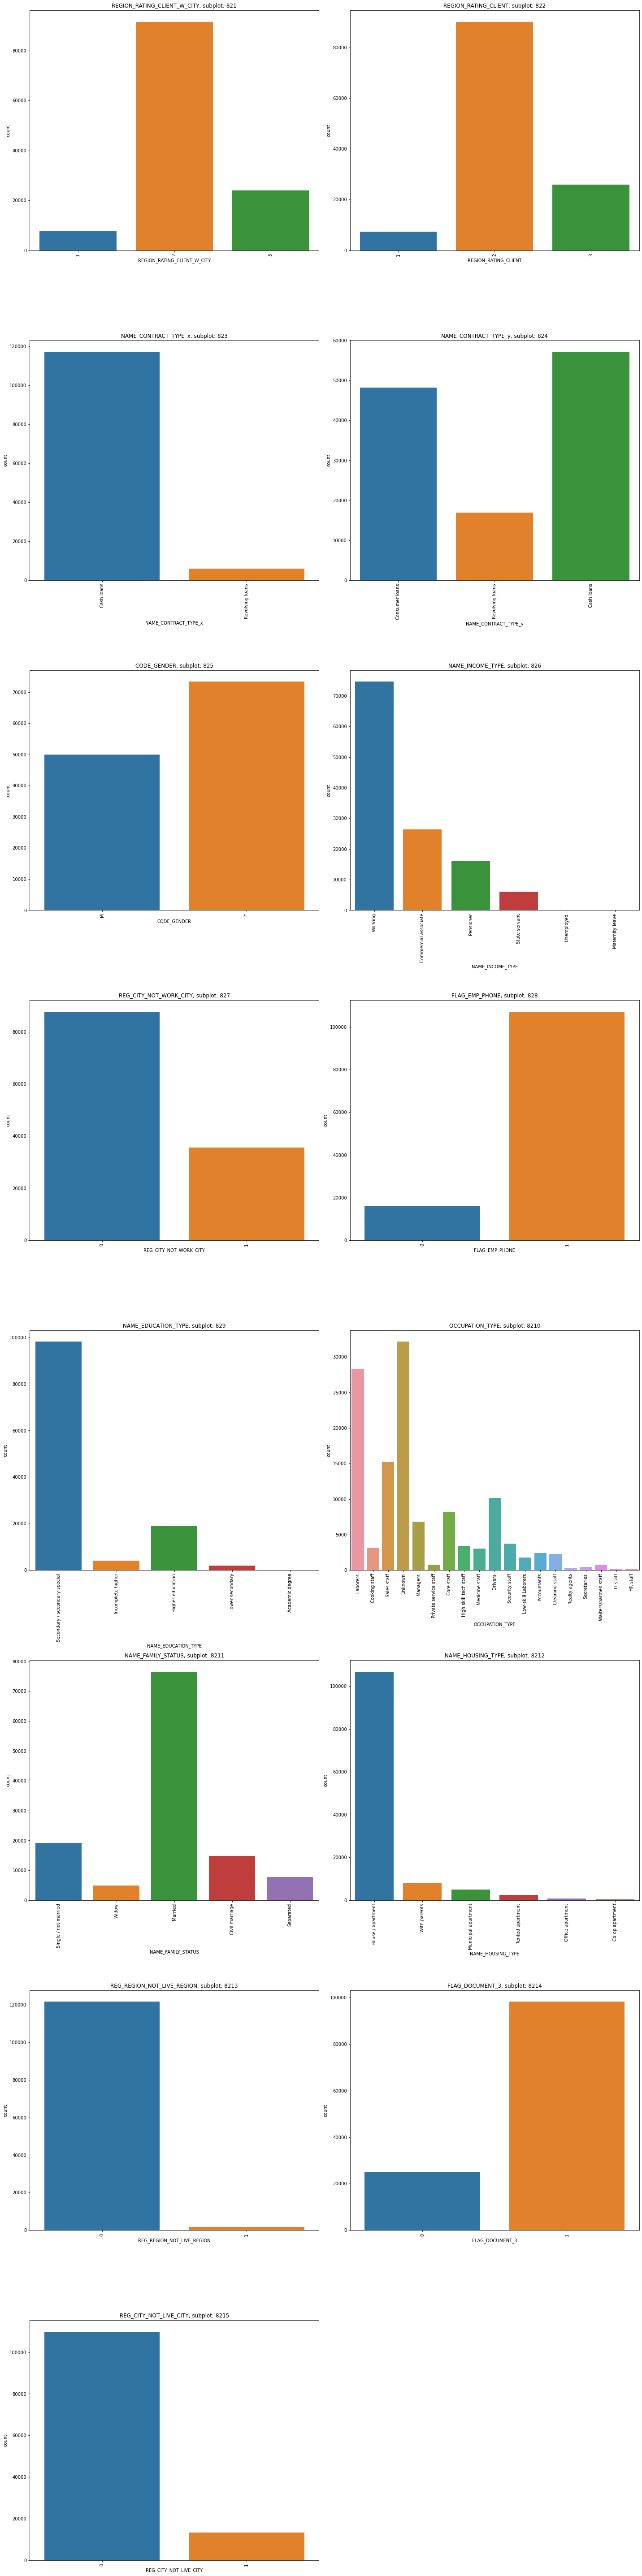

In [57]:
#Plot univariate graphs for categorical variables in inp_def
a = 8  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20, 80))
#cols_cat= ['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']
for i in cols_cat:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.tight_layout()
    plt.xticks(rotation=90)
    sns.countplot(inp_def[i])
    c = c + 1

plt.show()

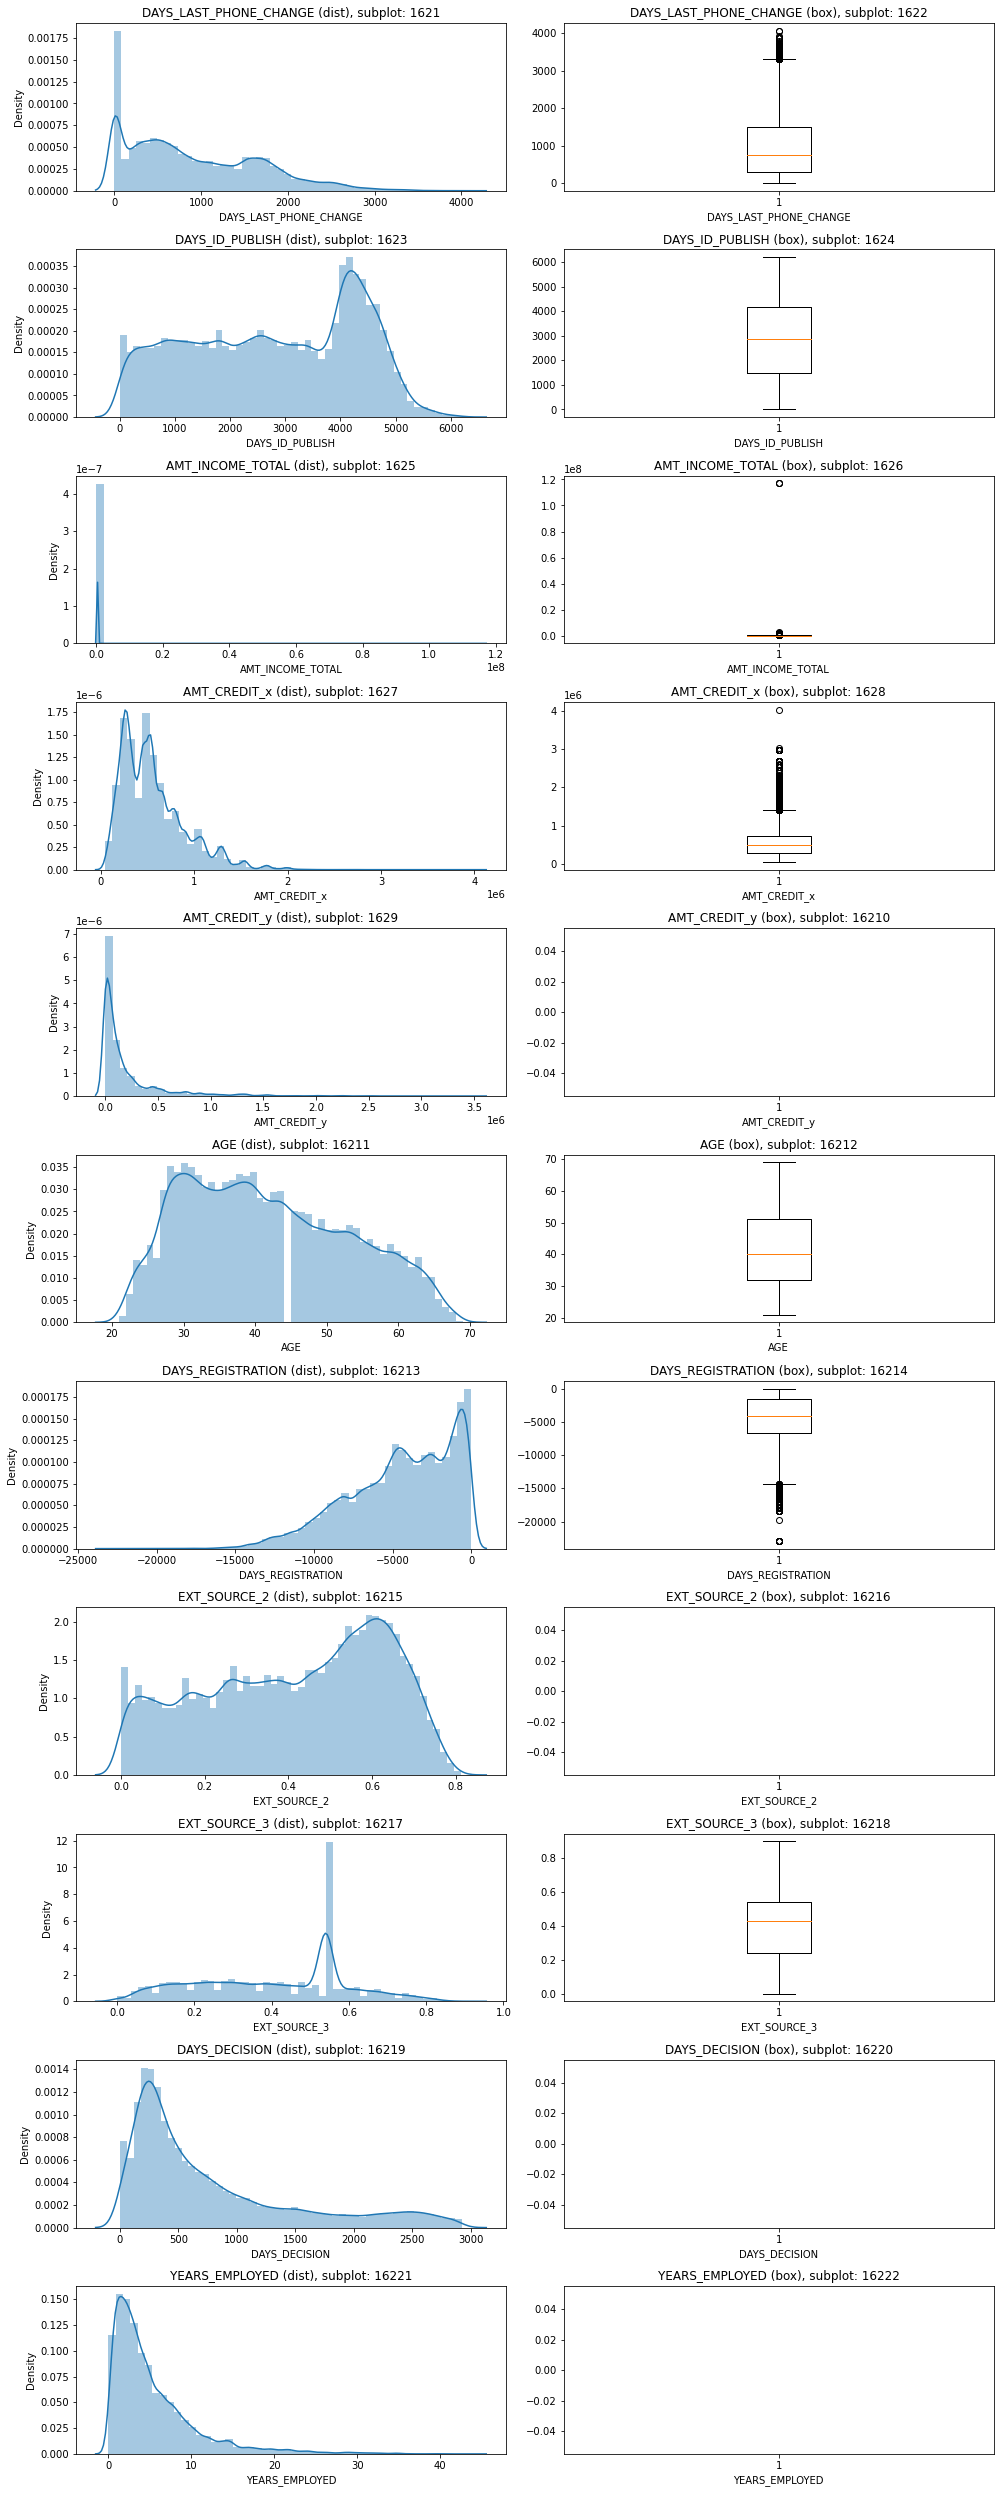

In [58]:
#Plot univariate graphs for numerical variables


#  plot Numerical Data
a = 16  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,50))

for i in cols_num:
    plt.tight_layout()
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(inp_def[i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.boxplot(x = inp_def[i])
    c = c + 1


plt.show()

<AxesSubplot:>

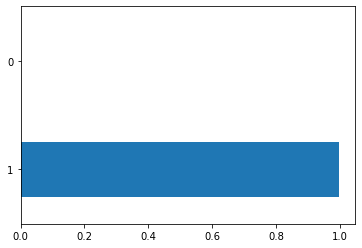

In [59]:
# Distribution of FLAG_CONT_MOBILE

inp_def.FLAG_CONT_MOBILE.value_counts(normalize=True).plot.barh()

In [60]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of AMT_INCOME_TOTAL variable
inp_def.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    157500.0
0.70    189000.0
0.90    270000.0
0.95    315000.0
0.99    450000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [61]:
inp_def[inp_def.AMT_INCOME_TOTAL > 450000].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,...,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,918.000000,9.180000e+02,9.180000e+02,918.000000,9.180000e+02,918.000000,918.000000,918.000000,918.0,918.000000,...,895.000000,895.000000,895.000000,659.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,0.380174,1.023880e+06,8.139421e+05,38990.485294,7.289167e+05,0.026162,-3858.895425,2727.925926,1.0,0.173203,...,0.998883,776.608939,200.215642,20.781487,337054.235577,7731.947115,34592.586538,69492.415865,77427.444712,0.355769
std,0.791393,6.648554e+06,4.689365e+05,17617.681820,4.355552e+05,0.018872,3051.961083,1579.407473,0.0,0.378629,...,0.033426,700.504985,674.898732,18.373139,97766.672864,56180.378798,107979.415345,144486.642253,150335.538473,0.479322
min,0.000000,4.585500e+05,1.069740e+05,7875.000000,9.450000e+04,0.001276,-12137.000000,8.000000,1.0,0.000000,...,0.000000,3.000000,-1.000000,0.000000,-2818.000000,-2878.000000,-2752.000000,-2752.000000,-2683.000000,0.000000
25%,0.000000,5.400000e+05,4.975200e+05,28017.000000,4.500000e+05,0.010147,-5723.000000,1287.000000,1.0,0.000000,...,1.000000,252.000000,-1.000000,6.000000,365243.000000,-1483.000000,-1007.250000,-1109.000000,-1085.500000,0.000000
50%,0.000000,5.400000e+05,6.750000e+05,36902.250000,6.750000e+05,0.022625,-3376.000000,2714.000000,1.0,0.000000,...,1.000000,536.000000,-1.000000,12.000000,365243.000000,-813.000000,-313.500000,-545.000000,-495.000000,0.000000
75%,0.000000,6.750000e+05,1.125000e+06,48294.000000,9.855000e+05,0.032561,-1289.000000,4284.000000,1.0,0.000000,...,1.000000,1098.500000,36.000000,30.000000,365243.000000,-500.500000,212.000000,-132.750000,-105.250000,1.000000
max,5.000000,1.170000e+08,4.027680e+06,115803.000000,3.600000e+06,0.072508,-2.000000,5943.000000,1.0,1.000000,...,1.000000,2912.000000,7525.000000,60.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Inferences

- The income amount does not clearly indicate whether a client becomes a defaulter. 
- We can see defaulters from low income range to outliers in the higher range

### Correlation check 


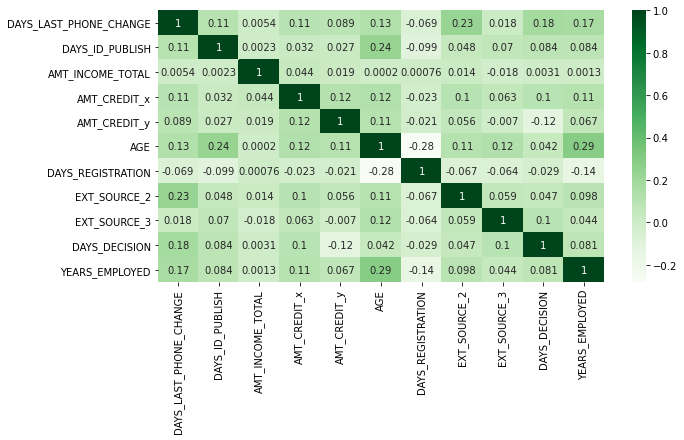

In [62]:
plt.figure(figsize=[10,5])
sns.heatmap(inp_def[inputList].corr(),annot=True,cmap="Greens")
plt.show()

There is a strong correlation between:
- Age, Years_Employed
- Age, Days_Id_Publish
- years_Employed, Days_ID_publish
- Days_Decision, Days_Last_Phone_Change

### Bivariate Analysis

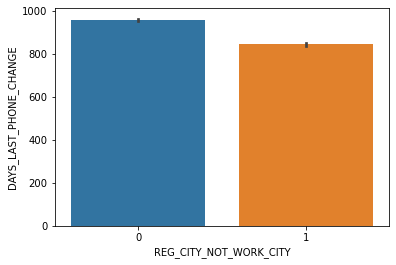

In [63]:
# REG_CITY_NOT_WORK_CITY Vs DAYS_LAST_PHONE_CHANGE
sns.barplot(data=inp_def, y="DAYS_LAST_PHONE_CHANGE", x="REG_CITY_NOT_WORK_CITY")
#plt.xticks(rotation=90)
plt.show()

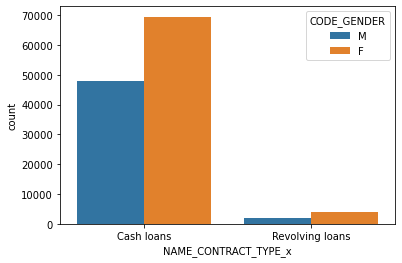

In [64]:
#NAME_CONTRACT_TYPE vs TARGET
sns.countplot(data=inp_def, x="NAME_CONTRACT_TYPE_x", hue="CODE_GENDER")
plt.show()

- Females have applied for more cash loans.
- Revolving loans are less in number.
- Males have applied less compared to females.

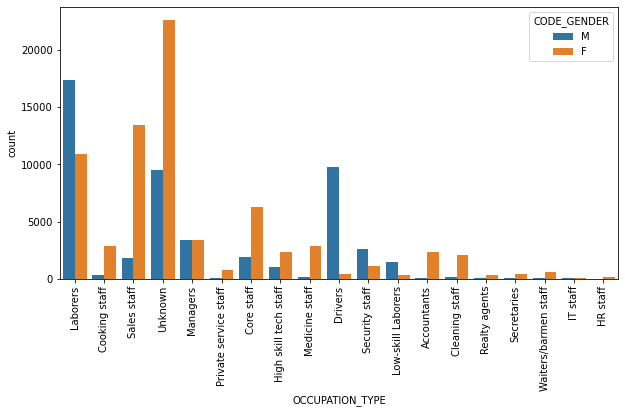

In [65]:
# Occupation type vs gender
plt.figure(figsize=[10,5])
sns.countplot(data=inp_def, x="OCCUPATION_TYPE", hue="CODE_GENDER")
plt.xticks(rotation=90)
plt.show()

- Male Labourers have applied for the most number of loans.
- Female Unknown occupation type have applied for most no. of loans.
- Core staff, accountants, Sales staff categories have more no. of females applying for loans

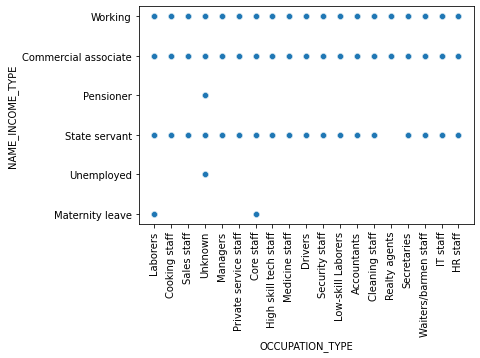

In [66]:
# INCOME_TYPE vs OCCUPATION_TYPE
sns.scatterplot(data=inp_def, x="OCCUPATION_TYPE", y="NAME_INCOME_TYPE")
plt.xticks(rotation=90)
plt.show()

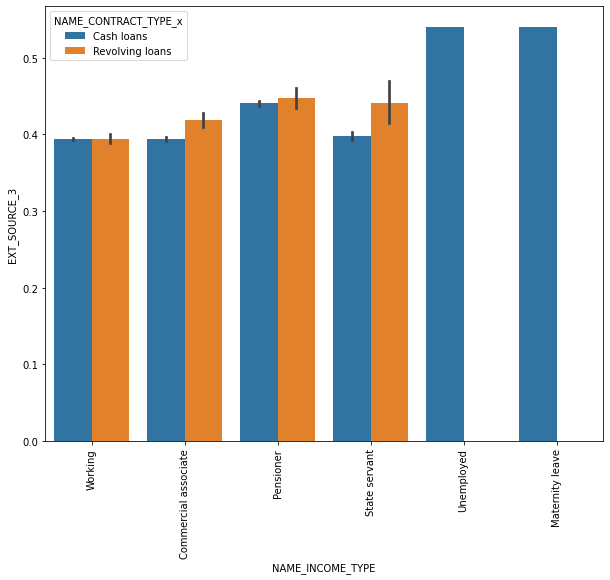

In [67]:
#Income type vs Loan type with External_Source_3
plt.figure(figsize=[10,8])
sns.barplot(data=inp_def, y="EXT_SOURCE_3", x="NAME_INCOME_TYPE"  ,hue="NAME_CONTRACT_TYPE_x")
plt.xticks(rotation=90)
plt.show()

- Students, unemployed, pensioner and maternity leave applicants have higher ext_source_score

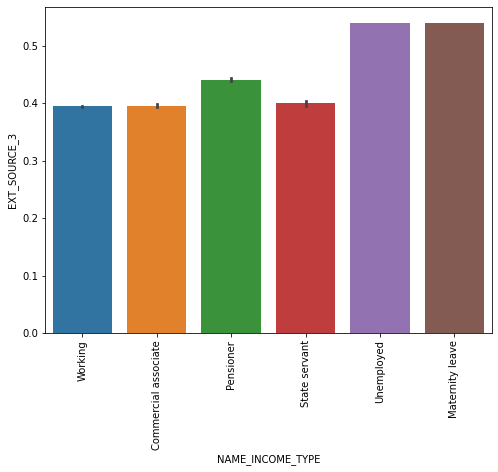

In [68]:
#Income type vs External_Source_3 
plt.figure(figsize=[8, 6])
sns.barplot(data=inp_def, y="EXT_SOURCE_3", x="NAME_INCOME_TYPE")
plt.xticks(rotation=90)
plt.show()

- Unemployed and Maternity Leave applicates have defaulted the payment despite of having highest EXT_SOURCE_3 score.
- all Income type groups with a normalized EXT_SOURCE_3 score of 0.5 or geater can be considered for loan approval except Unemployed and Maternity Leave

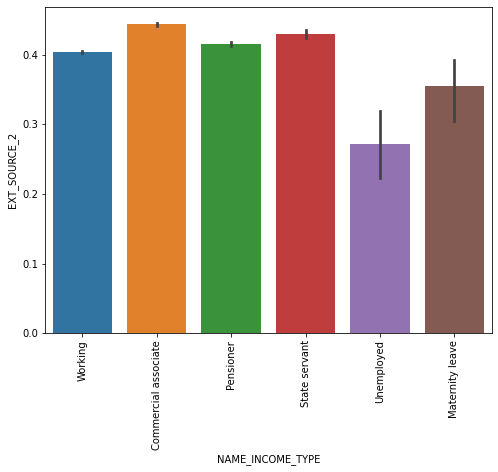

In [69]:
#Income type vs External_Source_2
plt.figure(figsize=[8, 6])
sns.barplot(data=inp_def, y="EXT_SOURCE_2", x="NAME_INCOME_TYPE")
plt.xticks(rotation=90)
plt.show()

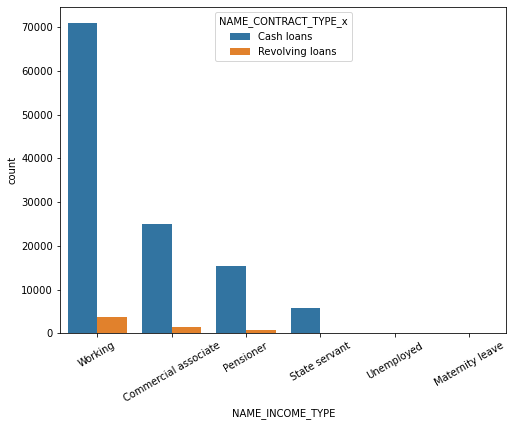

In [70]:
#Income type vs Loan type
plt.figure(figsize=[8, 6])
sns.countplot(data=inp_def, x="NAME_INCOME_TYPE"  ,hue="NAME_CONTRACT_TYPE_x")
plt.xticks(rotation=30)
plt.show()

- The working category of people(especially labourers) have applied for the most number of Cash loans, followed by Commercial Associate and Pensioner.
- The Revolving loans are not opted by the majority.
- Business conclusion: All the Working category of people with EXT_SOURCE_3 and EXT_SOURCE_2 score greater than 0.5 and who apply for cash loans can be approved.

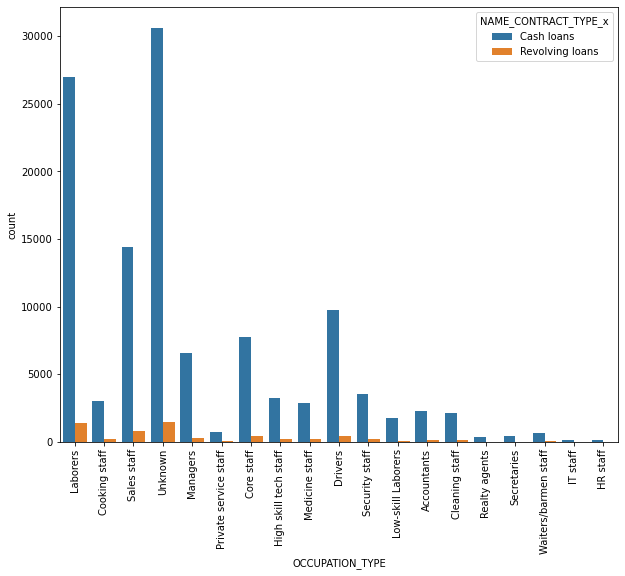

In [71]:
#Occupation type vs Loan type
plt.figure(figsize=[10,8])
sns.countplot(data=inp_def, x="OCCUPATION_TYPE"  ,hue="NAME_CONTRACT_TYPE_x")
plt.xticks(rotation=90)
plt.show()

### Observations
- Although Managers earn a higher income, there is an equal chance that they will default the loan payment
- Private service staff are more reliable and they are less likely to have payment difficulties.

In [72]:
inp_def.CODE_REJECT_REASON.value_counts(normalize=True)

XAP       0.743984
HC        0.140012
LIMIT     0.049061
SCO       0.026681
SCOFR     0.018610
CLIENT    0.015364
XNA       0.003614
VERIF     0.002330
SYSTEM    0.000343
Name: CODE_REJECT_REASON, dtype: float64

<AxesSubplot:>

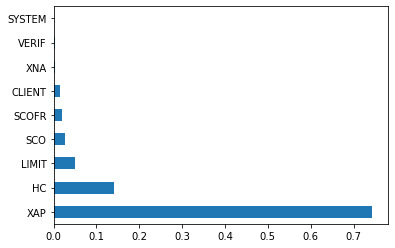

In [73]:
# CODE_REJECT_REASON
inp_def.CODE_REJECT_REASON.value_counts(normalize=True).plot.barh()

The graph clearly shows that most of the previous applications were not rejected (i.e XAP).

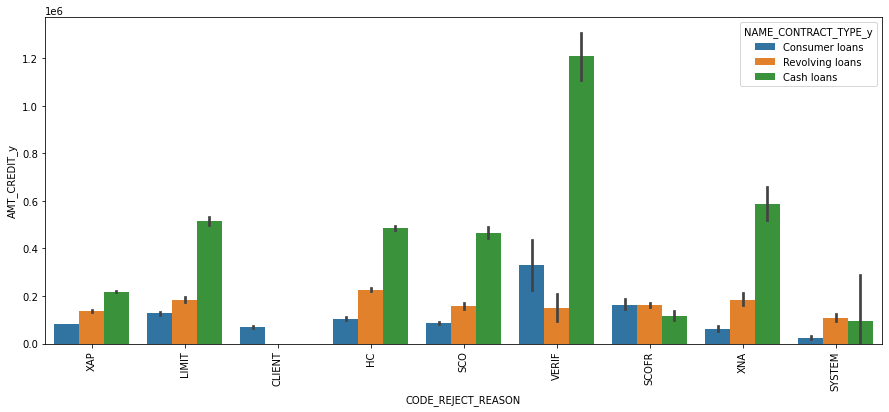

In [74]:
plt.figure(figsize=[15,6])
sns.barplot(data=inp_def, hue="NAME_CONTRACT_TYPE_y", x="CODE_REJECT_REASON", y="AMT_CREDIT_y" )
plt.xticks(rotation=90)
plt.show()

- Cash loans with very high credits were rejected on the basis of verification.

In [75]:
inp_def.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)

XAP                                 0.532311
XNA                                 0.404409
Repairs                             0.021391
Other                               0.013680
Urgent needs                        0.008847
Building a house or an annex        0.002649
Buying a used car                   0.002600
Payments on other loans             0.002061
Medicine                            0.002052
Everyday expenses                   0.001766
Education                           0.001145
Car repairs                         0.001038
Purchase of electronic equipment    0.000957
Journey                             0.000908
Wedding / gift / holiday            0.000769
Furniture                           0.000695
Buying a home                       0.000687
Buying a new car                    0.000654
Buying a holiday home / land        0.000450
Business development                0.000376
Gasification / water supply         0.000368
Hobby                               0.000074
Buying a g

In [76]:
inp_def.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Approved        0.549834
Refused         0.240652
Canceled        0.194150
Unused offer    0.015364
Name: NAME_CONTRACT_STATUS, dtype: float64

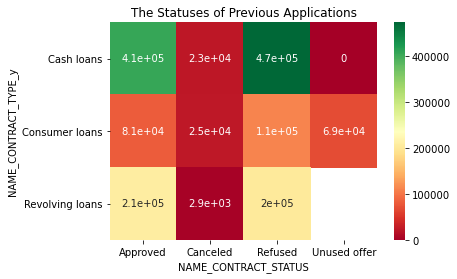

In [77]:
# Heatmap for NAME_CONTRACT_STATUS vs NAME_CONTRACT_TYPE_y vs AMT_CREDIT_y
res = pd.pivot_table(data=inp_def, index="NAME_CONTRACT_TYPE_y", columns="NAME_CONTRACT_STATUS", values="AMT_CREDIT_y")
sns.heatmap(res, annot=True, cmap= "RdYlGn")
plt.title("The Statuses of Previous Applications")
plt.show()

- Moderate credit amount cash loans were approved previously.
- Cash loans with low credit amount despite being approved by the bank were unused by the client.

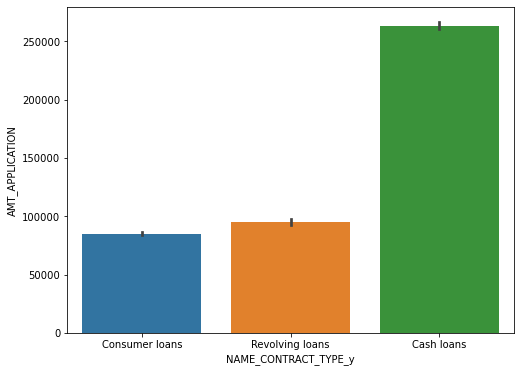

In [78]:
#Previous Application AMOUNT_APPLICATION vs AMOUNT_CREDIT

plt.figure(figsize=[8,6])
sns.barplot(data=inp_def,  y="AMT_APPLICATION", x="NAME_CONTRACT_TYPE_y" )
#plt.xticks(rotation=90)
plt.show()

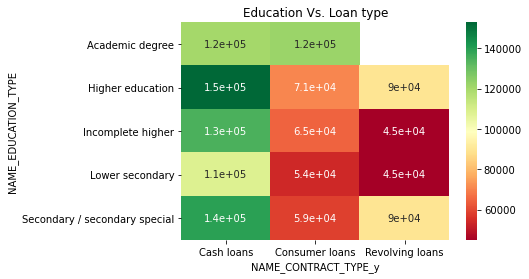

In [79]:
# Heatmap for EDUCATION_TYPE vs NAME_CONTRACT_TYPE_y vs AMT_CREDIT_y
res = pd.pivot_table(data=inp_def, columns="NAME_CONTRACT_TYPE_y", index="NAME_EDUCATION_TYPE", values="AMT_CREDIT_y", aggfunc=np.median)
sns.heatmap(res, annot=True, cmap= "RdYlGn")
plt.title("Education Vs. Loan type")
plt.show()

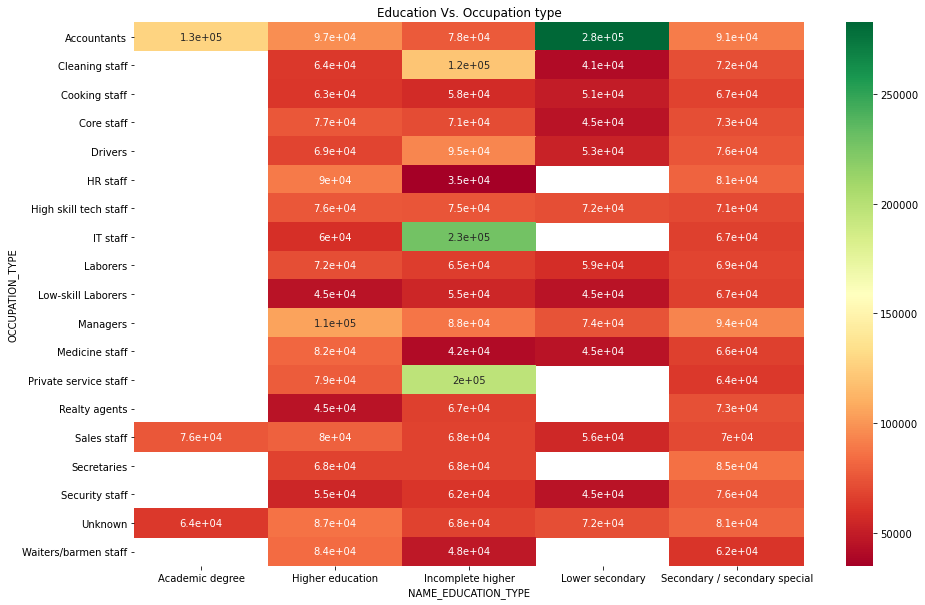

In [80]:
# Heatmap for EDUCATION_TYPE vs OCCUPATION_TYPE vs AMT_CREDIT_y
plt.figure(figsize=[15,10])
res = pd.pivot_table(data=inp_def, index="OCCUPATION_TYPE", columns="NAME_EDUCATION_TYPE", values="AMT_CREDIT_y", aggfunc=np.median)
sns.heatmap(res, annot=True, cmap= "RdYlGn")
plt.title("Education Vs. Occupation type")
plt.show()

The categories of people to be watchful for while approving loans and who are defaulters: 
- Accountants who have lower secondary education and high credit amount
- IT Staff and Private Service Staff with Incomplete higher education and high credit amount


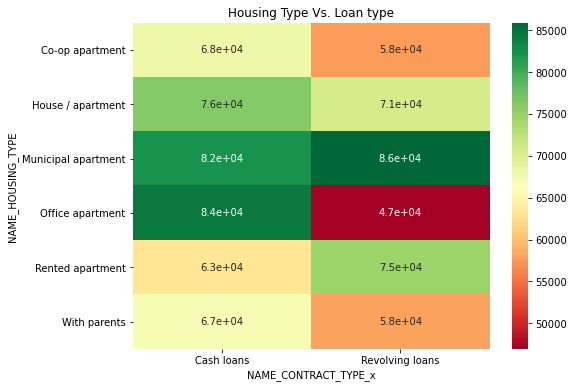

In [81]:
# Heatmap for Housing type vs NAME_CONTRACT_TYPE_y vs AMT_CREDIT_y
plt.figure(figsize=[8,6])
res = pd.pivot_table(data=inp_def, columns="NAME_CONTRACT_TYPE_x", index="NAME_HOUSING_TYPE", values="AMT_CREDIT_y", aggfunc=np.median)
sns.heatmap(res, annot=True, cmap= "RdYlGn")
plt.title("Housing Type Vs. Loan type")
plt.show()

- All the clients who have applied for loans and who are on Maternity leave have defaulted at least once.

<AxesSubplot:>

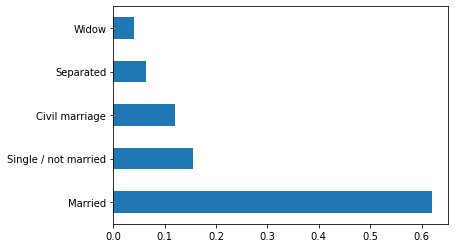

In [82]:
inp_def.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()

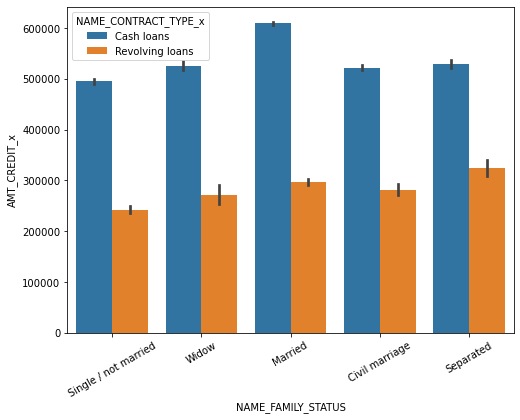

In [83]:
# Plot of Family status Vs Credit amount
plt.figure(figsize=[8,6])
sns.barplot(data=inp_def, x="NAME_FAMILY_STATUS", y="AMT_CREDIT_x"  ,hue="NAME_CONTRACT_TYPE_x")
plt.xticks(rotation=30)
plt.show()

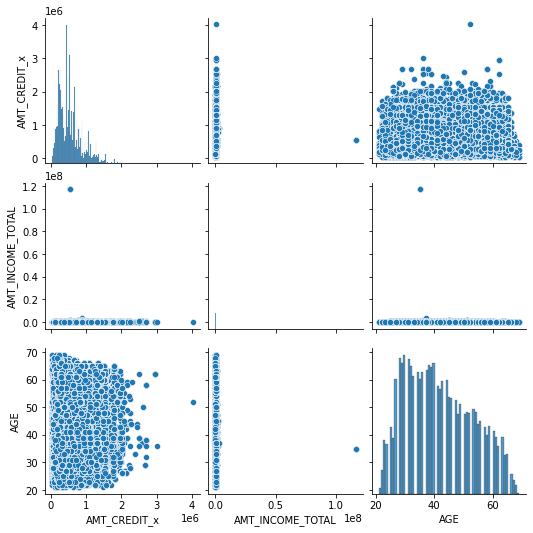

In [84]:
#plot the pair plot of AMT_CREDIT, AMT_INCOME_TOTAL and age in inp0 dataframe.
sns.pairplot(data=inp_def, vars=["AMT_CREDIT_x","AMT_INCOME_TOTAL", "AGE"])

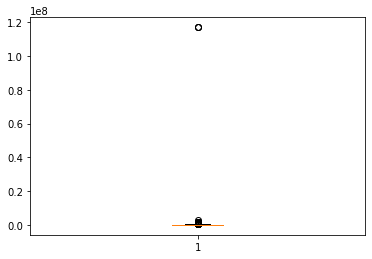

In [85]:
plt.boxplot(inp_def.AMT_INCOME_TOTAL)

plt.show()

In [86]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of AMT_INCOME_TOTAL variable
inp0.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    157500.0
0.70    202500.0
0.90    270000.0
0.95    337500.0
0.99    450000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [87]:
inp0[inp0.AMT_INCOME_TOTAL > 450000.0].describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,13275.000000,13275.000000,1.327500e+04,1.327500e+04,13275.000000,1.326700e+04,13275.000000,13275.000000,13275.000000,13275.0,...,12648.000000,12648.000000,12648.000000,9928.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000
mean,0.069153,0.486177,7.030384e+05,1.026015e+06,47777.122373,9.438254e+05,0.030763,-4217.072392,2876.574313,1.0,...,0.996205,901.145557,313.600806,17.515814,339439.945113,12917.763512,36049.131896,69147.200084,75472.324559,0.327779
std,0.253723,0.783965,1.821228e+06,5.220314e+05,23563.379184,4.898250e+05,0.021857,3313.778563,1562.739803,0.0,...,0.061490,777.483016,941.375968,16.127500,93749.791991,70381.594830,109981.247521,144135.823743,148855.600997,0.469437
min,0.000000,0.000000,4.502250e+05,4.500000e+04,5598.000000,4.500000e+04,0.001276,-18386.000000,0.000000,1.0,...,0.000000,2.000000,-1.000000,0.000000,-2918.000000,-2890.000000,-2796.000000,-2866.000000,-2755.000000,0.000000
25%,0.000000,0.000000,5.400000e+05,6.666750e+05,33399.000000,5.850000e+05,0.011657,-6249.000000,1565.000000,1.0,...,1.000000,285.750000,-1.000000,6.000000,365243.000000,-1637.000000,-1226.750000,-1330.750000,-1271.750000,0.000000
50%,0.000000,0.000000,5.850000e+05,9.405000e+05,44748.000000,9.000000e+05,0.025164,-3666.000000,3061.000000,1.0,...,1.000000,640.000000,-1.000000,12.000000,365243.000000,-880.000000,-380.500000,-595.000000,-554.000000,0.000000
75%,0.000000,1.000000,6.750000e+05,1.305000e+06,57015.000000,1.152000e+06,0.046220,-1338.000000,4270.000000,1.0,...,1.000000,1316.000000,83.000000,24.000000,365243.000000,-478.000000,130.750000,-129.250000,-92.250000,1.000000
max,1.000000,5.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,0.000000,6206.000000,1.0,...,1.000000,2922.000000,30180.000000,72.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


- Although there are outliers in the Income_total column, we cannot impute or remove the rows because it will skew our analysis.
- There may be clients who are businessmen or managers or Realtors who are earning a huge income.

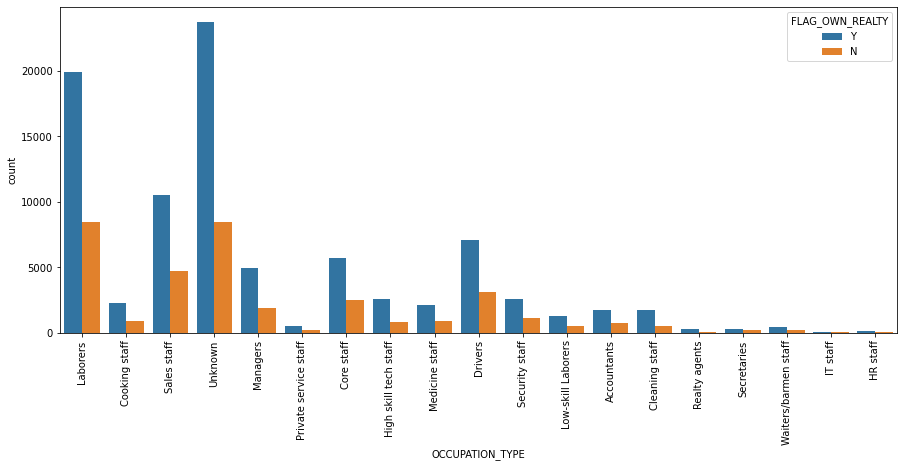

In [88]:
# Plot of Occupation Type Vs. Own house 
plt.figure(figsize=[15,6])
sns.countplot(data=inp_def, x="OCCUPATION_TYPE", hue="FLAG_OWN_REALTY")
plt.xticks(rotation=90)
plt.show()

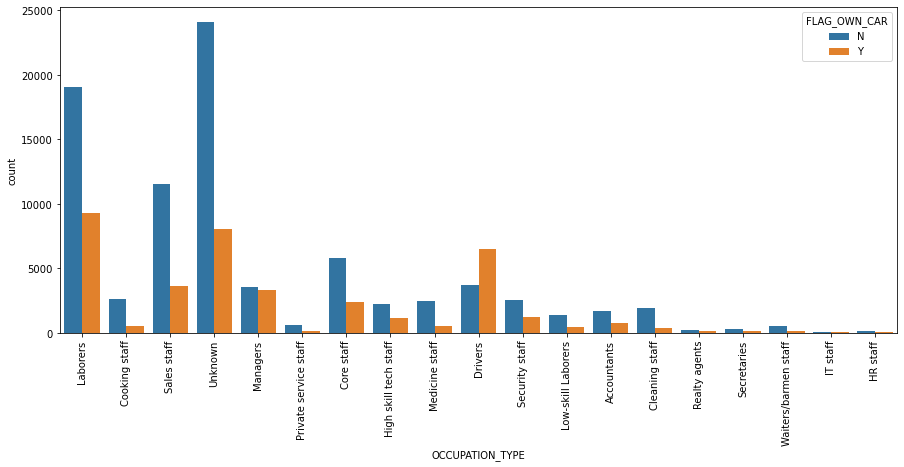

In [89]:
# Plot of Occupation Type Vs. Own car 
plt.figure(figsize=[15,6])
sns.countplot(data=inp_def, x="OCCUPATION_TYPE", hue="FLAG_OWN_CAR")
plt.xticks(rotation=90)
plt.show()

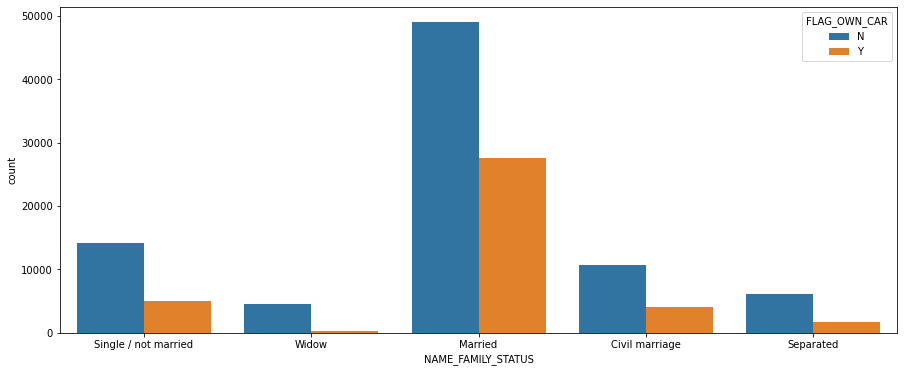

In [90]:
# Plot of Family Type Vs. Own car 
plt.figure(figsize=[15,6])
sns.countplot(data=inp_def, x="NAME_FAMILY_STATUS", hue="FLAG_OWN_CAR")
plt.show()

- The number of applicants who do not own a car is greater than those who own a car.
- Hence we can frame a hypothesis that maybe they are applying for cash loans to buy a new car.

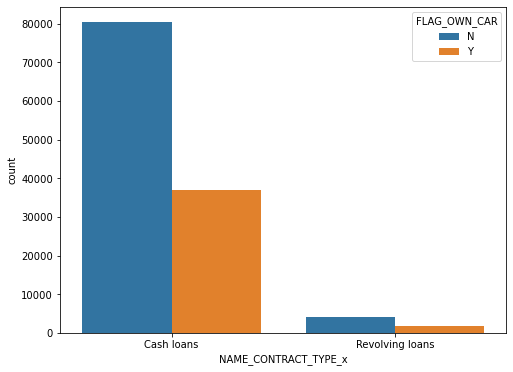

In [91]:
# Plot of Loan Type Vs. Own car 
plt.figure(figsize=[8,6])
sns.countplot(data=inp_def, x="NAME_CONTRACT_TYPE_x", hue="FLAG_OWN_CAR")
plt.show()

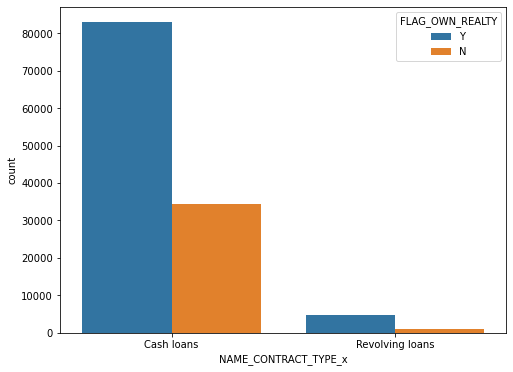

In [92]:
# Plot of Loan Type Vs. Own car 
plt.figure(figsize=[8,6])
sns.countplot(data=inp_def, x="NAME_CONTRACT_TYPE_x", hue="FLAG_OWN_REALTY")
plt.show()

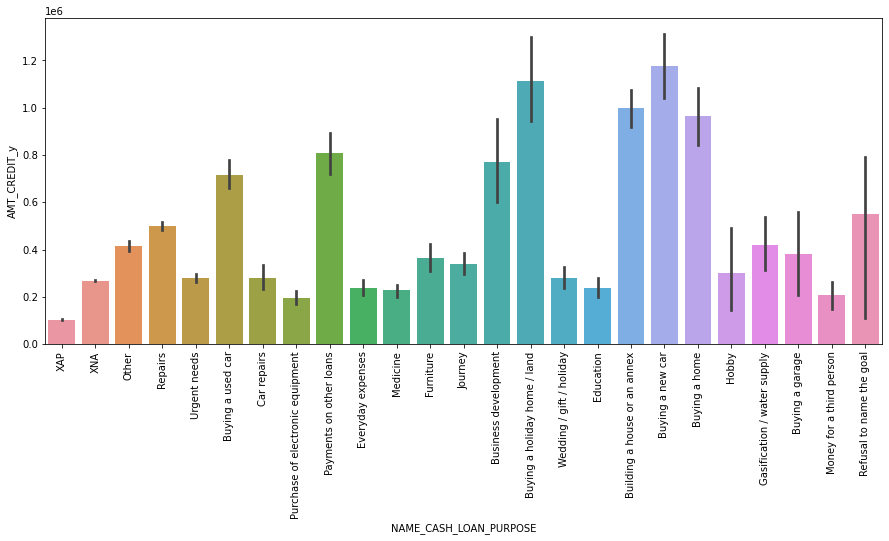

In [93]:
# Bar plot for NAME_CASH_LOAN_PURPOSE Vs Credit Amount of previous application
plt.figure(figsize=[15,6])
sns.barplot(data=inp_def, x="NAME_CASH_LOAN_PURPOSE",y="AMT_CREDIT_y")
plt.xticks(rotation=90)
plt.show()


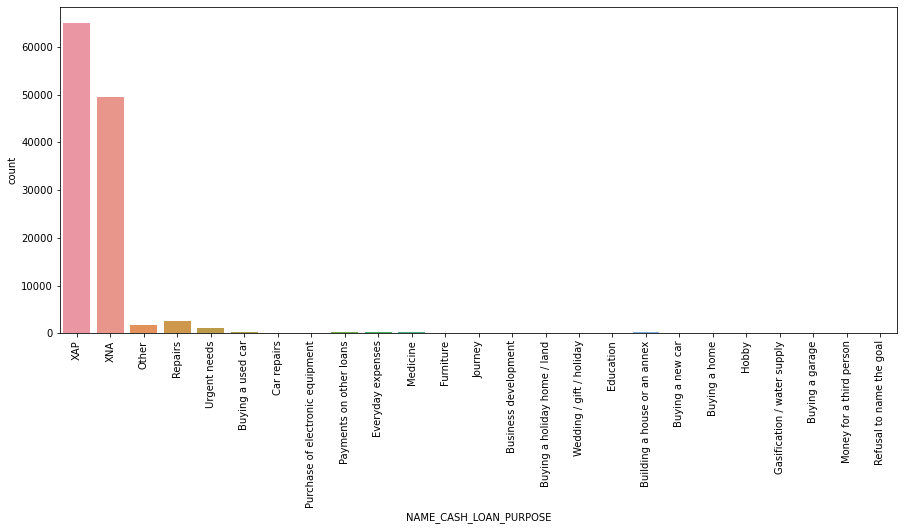

In [94]:
plt.figure(figsize=[15,6])
sns.countplot(data=inp_def, x="NAME_CASH_LOAN_PURPOSE")
plt.xticks(rotation=90)
plt.show()

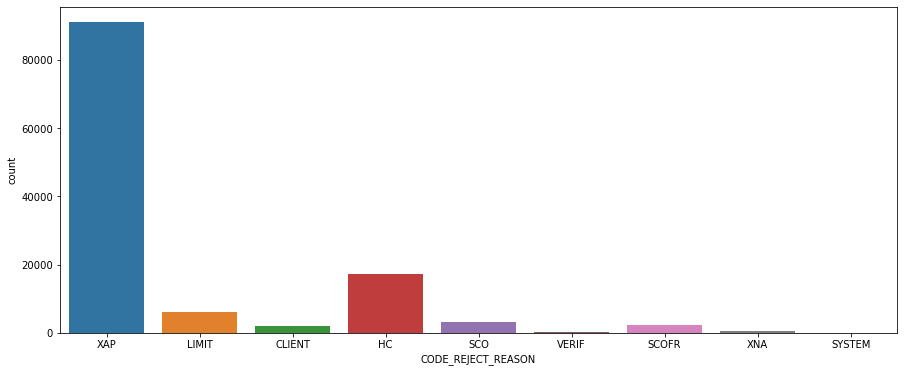

In [95]:
plt.figure(figsize=[15,6])
sns.countplot(data=inp_def, x="CODE_REJECT_REASON")
plt.show()

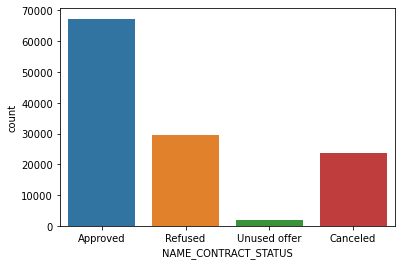

In [96]:
plt.figure(figsize=[6,4])
sns.countplot(data=inp_def, x="NAME_CONTRACT_STATUS")
plt.show()

- Although the clients have been defaulters, majority of their loans had been approved previously

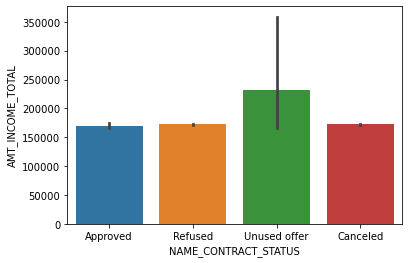

In [97]:
#Plot Total income Vs Loan Status of previous application
plt.figure(figsize=[6,4])
sns.barplot(data=inp_def, x="NAME_CONTRACT_STATUS", y="AMT_INCOME_TOTAL")
plt.show()

- Although some of the defaulters previous loan was approved, people with higher income have unused the offer. 
- This maybe because they might have got a better offer elsewhere

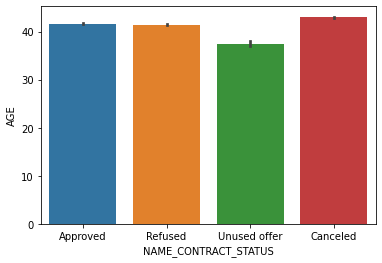

In [98]:
#Plot Age Vs Loan Status of previous application
plt.figure(figsize=[6,4])
sns.barplot(data=inp_def, x="NAME_CONTRACT_STATUS", y="AGE")
plt.show()

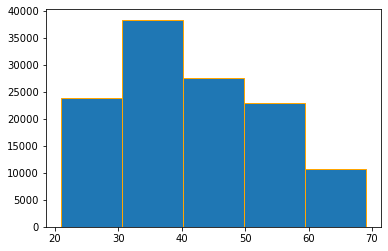

In [99]:
#Defaulters age counts
plt.figure(figsize=[6,4])
plt.hist(inp_def.AGE, bins=5, edgecolor="Orange")
plt.show()

- Majority of the defaulters lie in the age bracket 30-40

In [100]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
inp_def[["AMT_CREDIT_x","AMT_CREDIT_y", "AMT_ANNUITY_x", "AMT_INCOME_TOTAL"]].corr()

,AMT_CREDIT_x,AMT_CREDIT_y,AMT_ANNUITY_x,AMT_INCOME_TOTAL
AMT_CREDIT_x,1.000000,0.118029,0.746156,0.043748
AMT_CREDIT_y,0.118029,1.000000,0.094153,0.019163
AMT_ANNUITY_x,0.746156,0.094153,1.000000,0.056099
AMT_INCOME_TOTAL,0.043748,0.019163,0.056099,1.000000


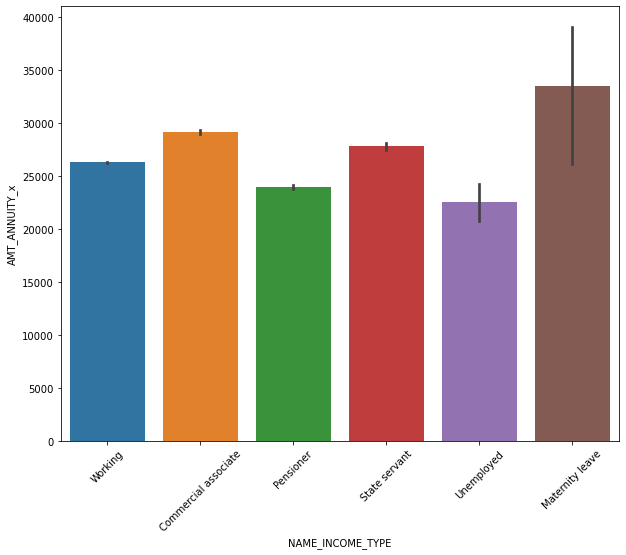

In [101]:
#AMT_ANNUITY vs NAME_INCOME_TYPE

plt.figure(figsize=[10,8])
sns.barplot(data=inp_def, x="NAME_INCOME_TYPE", y="AMT_ANNUITY_x")
plt.xticks(rotation=45)
plt.show()

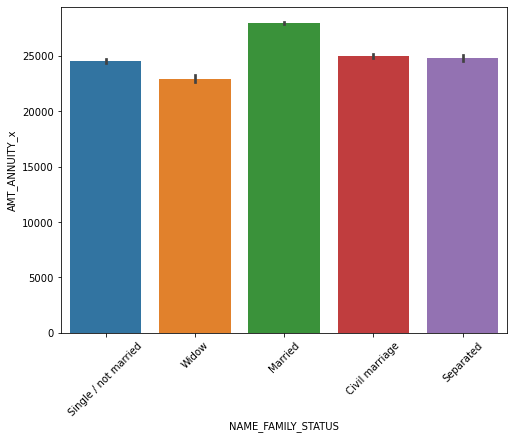

In [102]:
#AMT_ANNUITY vs NAME_FAMILY_STATUS

plt.figure(figsize=[8,6])
sns.barplot(data=inp_def, x="NAME_FAMILY_STATUS", y="AMT_ANNUITY_x")
plt.xticks(rotation=45)
plt.show()

In [103]:
inp_def.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.827129
Family             0.121794
Spouse, partner    0.034187
Children           0.009205
Other_B            0.004741
Other_A            0.002017
Group of people    0.000927
Name: NAME_TYPE_SUITE, dtype: float64

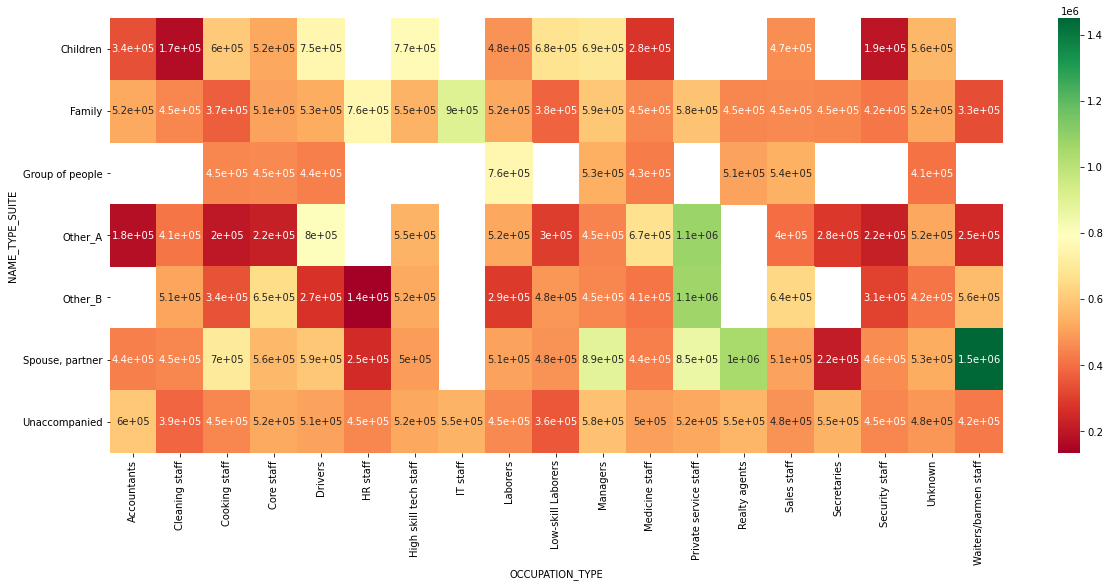

In [104]:
# Barplot for NAME_TYPE_SUITE vs OCCUPATION_TYPE 
plt.figure(figsize=[20,8])
res = pd.pivot_table(data=inp_def, columns="OCCUPATION_TYPE", index="NAME_TYPE_SUITE", values="AMT_CREDIT_x", aggfunc=np.median)
sns.heatmap(res, annot=True, cmap= "RdYlGn")
plt.show()

The company should be careful while issuing the loan to following category:
- Waiter/Barmen staff accompanied by spouse/partner for high value of credit amount and tend to default

## Segmented Analysis of Other cases (Not Defaulters)

### UNIVARIATE ANALYSIS OF VARIABLES

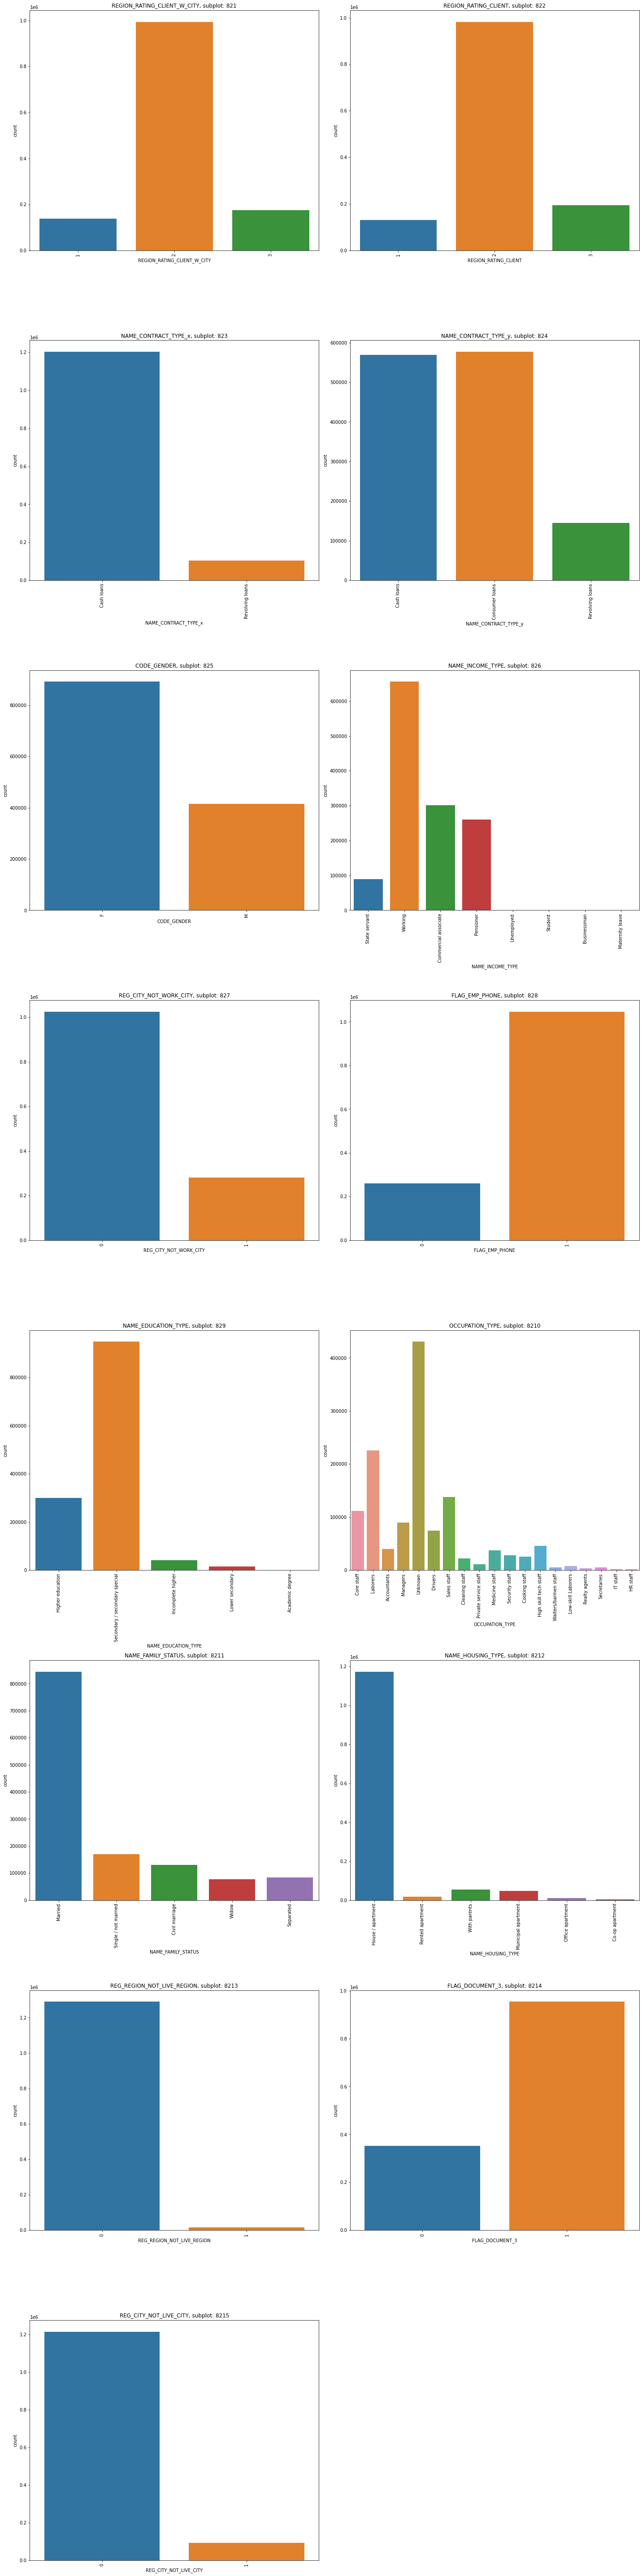

In [105]:
#Plot univariate graphs for categorical variables in inp_other
a = 8  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20, 80))
#cols_cat= ['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']
for i in cols_cat:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.tight_layout()
    plt.xticks(rotation=90)
    sns.countplot(inp_other[i])
    c = c + 1

plt.show()

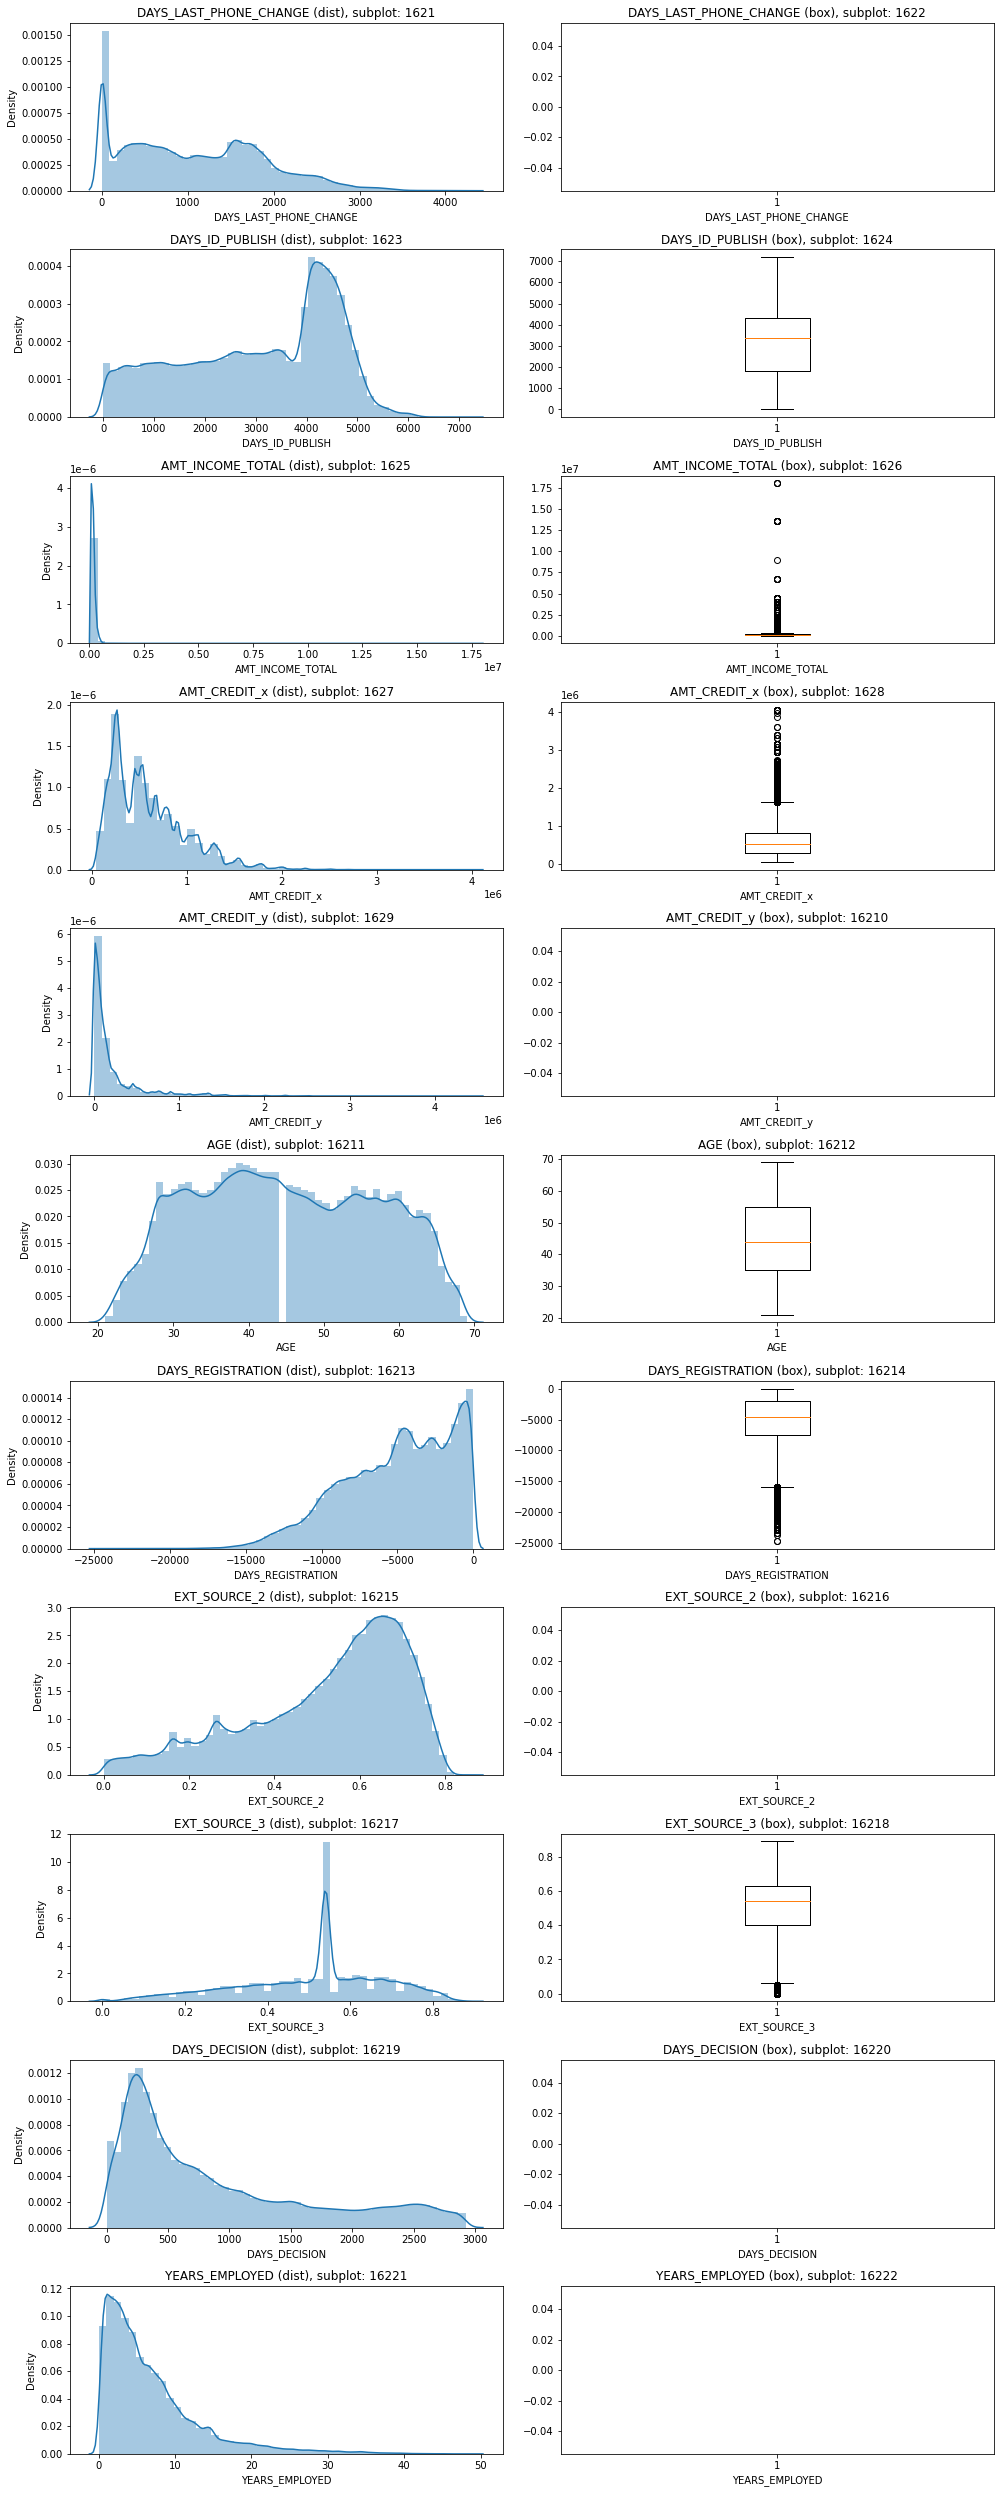

In [106]:
#Plot univariate graphs for numerical variables


#  plot Numerical Data
a = 16  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,50))

for i in cols_num:
    plt.tight_layout()
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(inp_other[i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.boxplot(x = inp_other[i])
    c = c + 1


plt.show()

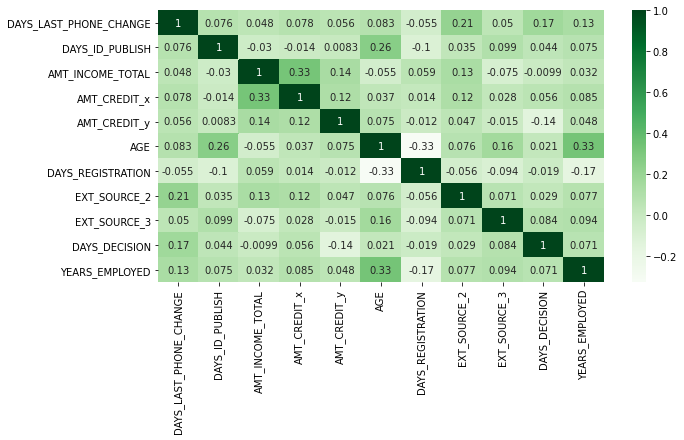

In [107]:
# Correlation matrix for other cases
plt.figure(figsize=[10,5])
sns.heatmap(inp_other[inputList].corr(),annot=True,cmap="Greens")
plt.show()

Correlated variables:
- AGE, DAYS_ID_PUBLISH
- EXT_SOURCE_2, DAYS_LAST_PHONE_CHANGE
- AGE, YEARS_EMPLOYED
- AMT_CREDIT_x, AMT_INCOME_TOTAL

## Comparing variables for Defaulters and Others side-by-side

In [108]:
# Uni variate analysis
#Common method to plot univariables
def uniPlot(i):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
    m1=inp_other[i].hist(ax=ax1)
    m1.title.set_text("Client with No Payment Difficulty-"+i)
    ax1.tick_params(axis='x', labelrotation=90)
    m2=inp_def[i].hist(ax=ax2)
    m2.title.set_text("Client  with Payment Difficulty-"+i)
    ax2.tick_params(axis='x', labelrotation=90)
    plt.show()

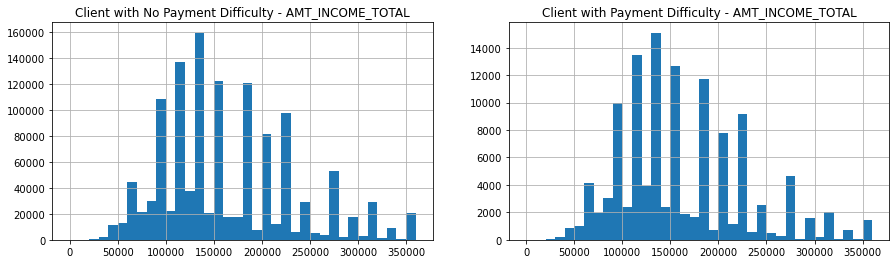

In [109]:
# TARGET vs AMT_INCOME_TOTAL

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000, 250000, 260000, 270000, 280000, 290000, 300000, 310000, 320000, 330000, 340000, 350000, 360000 ]
m1=inp_other['AMT_INCOME_TOTAL'].hist(bins=bins,ax=ax1)
m1.title.set_text("Client with No Payment Difficulty - AMT_INCOME_TOTAL")
m2=inp_def['AMT_INCOME_TOTAL'].hist(bins=bins,ax=ax2)
m2.title.set_text("Client with Payment Difficulty - AMT_INCOME_TOTAL")
plt.show()

- Most of defatulters AMT_INCOME_TOTAL lies between 1.2 to 2.4 lacs

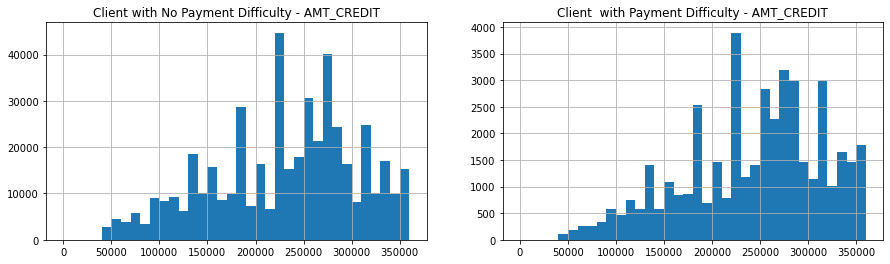

In [110]:
#TARGET vs AMT_CREDIT
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000, 250000, 260000, 270000, 280000, 290000, 300000, 310000, 320000, 330000, 340000, 350000, 360000 ]
m1=inp_other['AMT_CREDIT_x'].hist(bins=bins,ax=ax1)
m1.title.set_text("Client with No Payment Difficulty - AMT_CREDIT")
m2=inp_def['AMT_CREDIT_x'].hist(bins=bins,ax=ax2)
m2.title.set_text("Client  with Payment Difficulty - AMT_CREDIT")
plt.show()

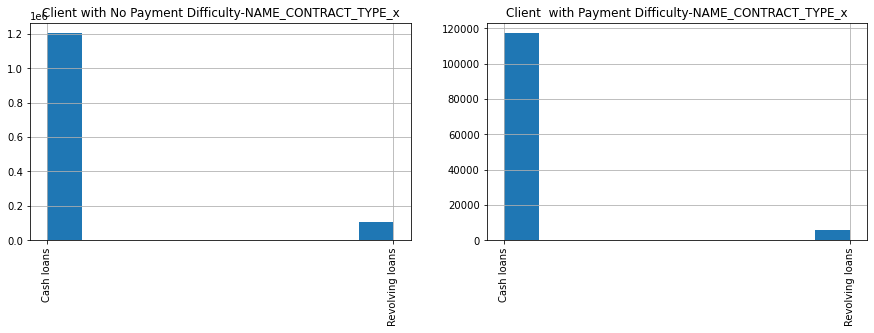

In [111]:
#"TARGET" vs"NAME_CONTRACT_TYPE
uniPlot('NAME_CONTRACT_TYPE_x')

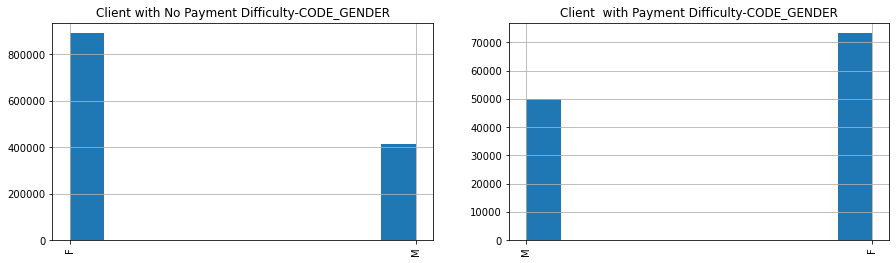

In [112]:
#TARGET" vs"CODE_GENDER"
uniPlot('CODE_GENDER')

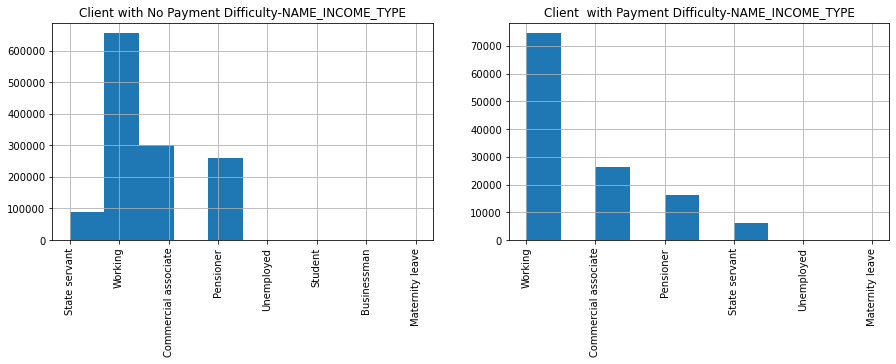

In [113]:
#"TARGET" vs"NAME_INCOME_TYPE"
uniPlot('NAME_INCOME_TYPE')

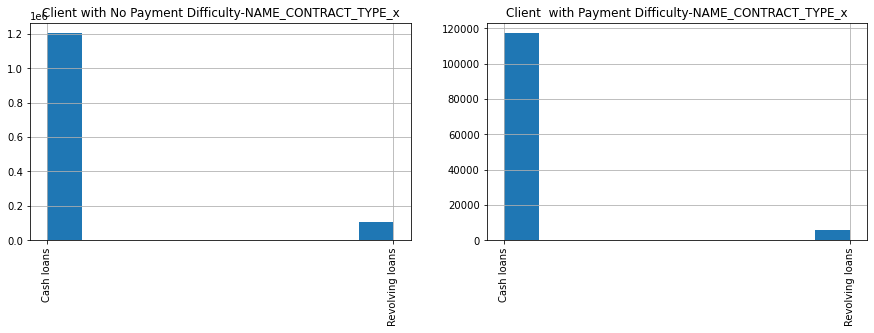

In [114]:
#"TARGET" vs"NAME_CONTRACT_TYPE"
uniPlot('NAME_CONTRACT_TYPE_x')

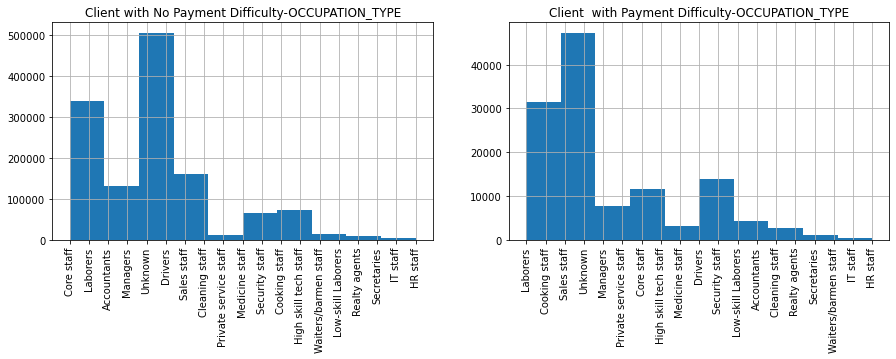

In [115]:
#"TARGET" vs "OCCUPATION_TYPE"
uniPlot('OCCUPATION_TYPE')

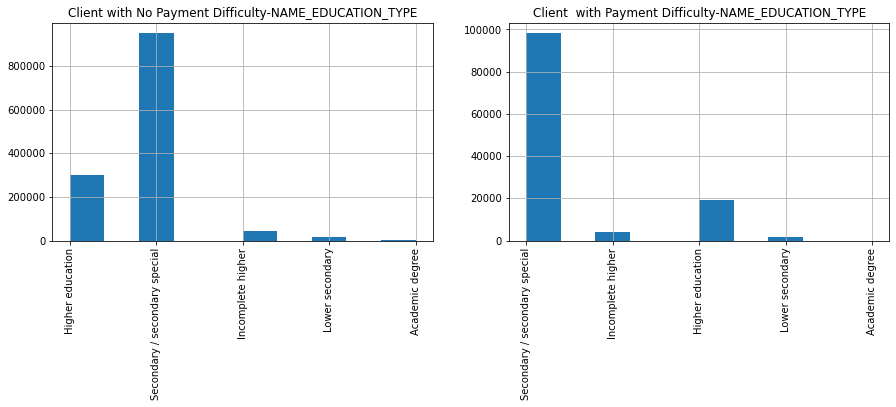

In [116]:
#"TARGET" vs"NAME_EDUCATION_TYPE"
uniPlot('NAME_EDUCATION_TYPE')

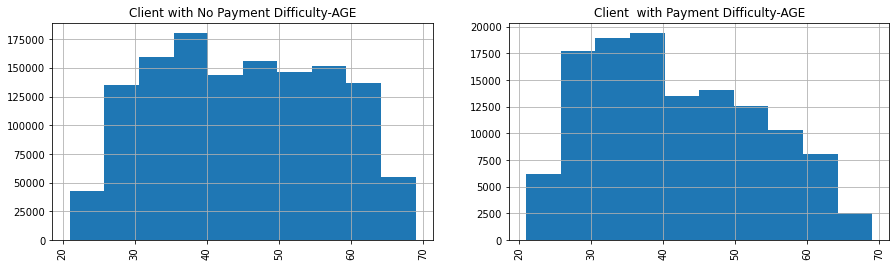

In [117]:
# TARGET vs AGE
uniPlot('AGE')

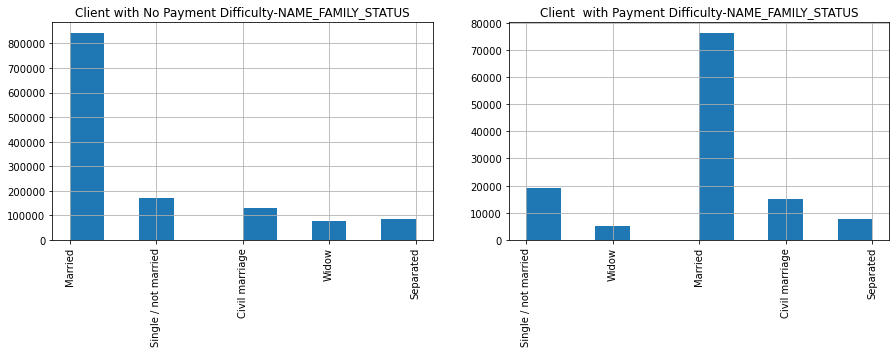

In [118]:
# "TARGET" vs"NAME_FAMILY_STATUS"

uniPlot('NAME_FAMILY_STATUS')

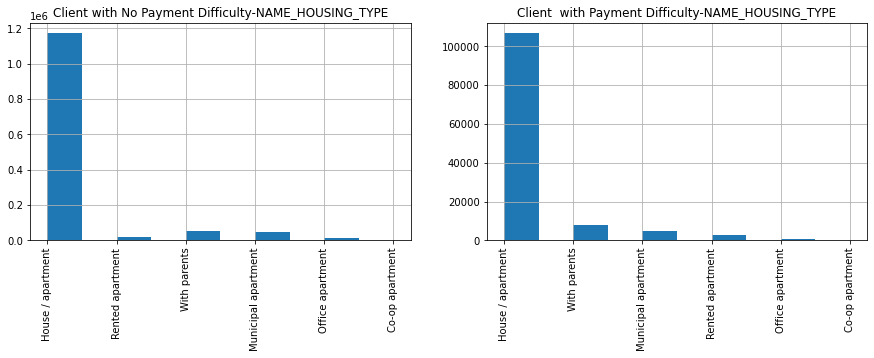

In [119]:
# "TARGET" vs"NAME_HOUSING_TYPE"

uniPlot('NAME_HOUSING_TYPE')

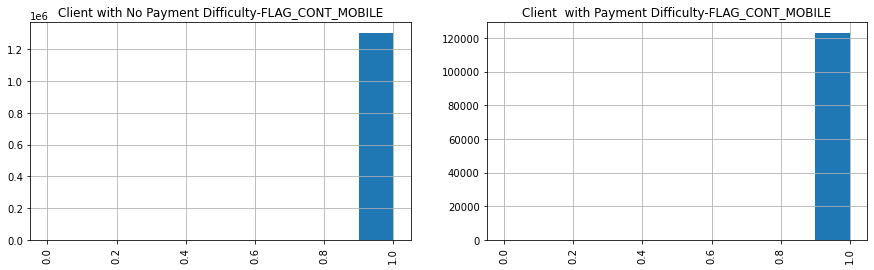

In [120]:
# "TARGET" vs"FLAG_CONT_MOBILE"

uniPlot('FLAG_CONT_MOBILE')

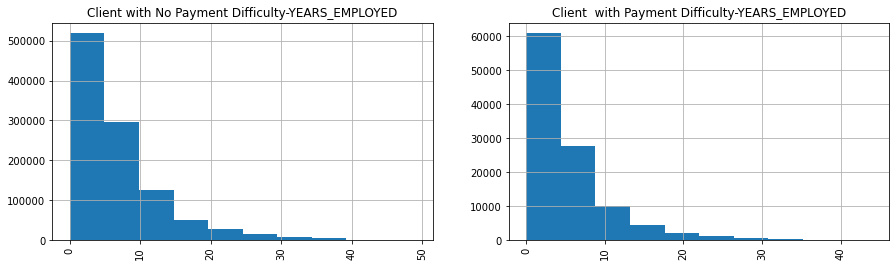

In [121]:
# "TARGET" vs"YEARS_EMPLOYED"

uniPlot('YEARS_EMPLOYED')

### Bivariate and Multivariate Analysis

In [123]:
#  Bi Variate Analysis

# common method to plot graph 
def biPlot(i,j):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,4))
    m1=sns.scatterplot(data=inp_other, x=i, y=j,ax=ax1)
    m1.title.set_text("People with No Payment Difficulty")
    m2=sns.scatterplot(data=inp_def, x=i, y=j,ax=ax2)
    m2.title.set_text("People with Payment Difficulty")
    plt.show()

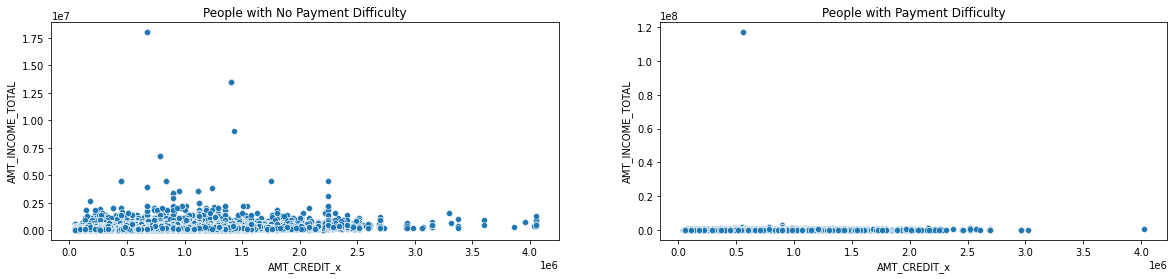

In [124]:
biPlot('AMT_CREDIT_x','AMT_INCOME_TOTAL')

- Even though the income is in the lower bracket, clients have applied for varied credit amount.
- Even though the income is high, the applicants tend to have low credit amount

#### Inferences
- Since majority of the applicants are laborers and do not have much savings, they rely on loans to fulfill their needs and desires.
- People who earn a steady and higher income invest in savings and they are better equipped to handle their finances and hence they do not require large loans.

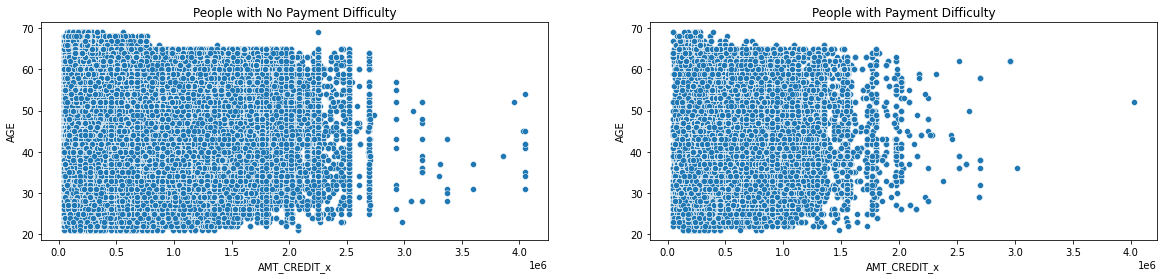

In [125]:
biPlot('AMT_CREDIT_x','AGE')

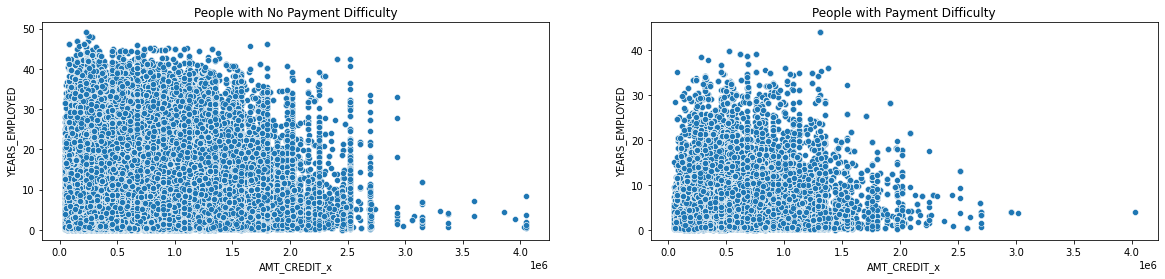

In [126]:
biPlot('AMT_CREDIT_x','YEARS_EMPLOYED')

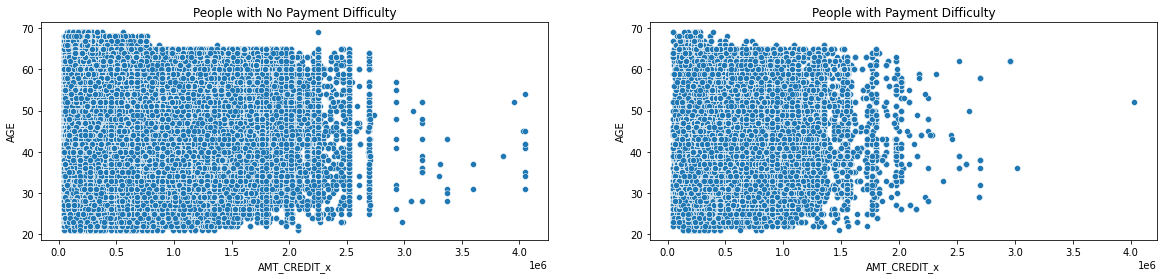

In [127]:
biPlot('AMT_CREDIT_x','AGE')

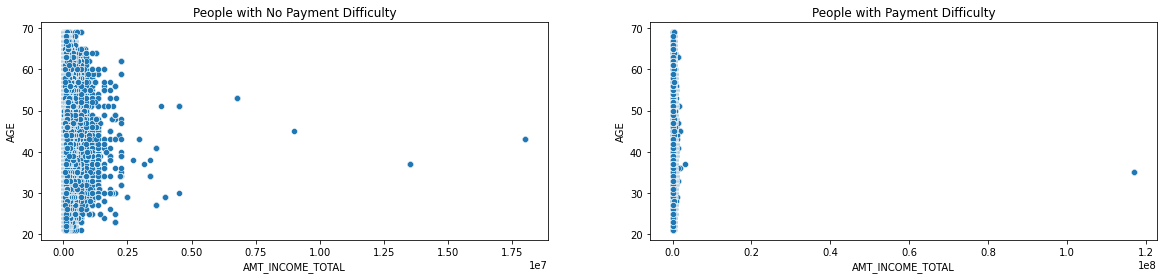

In [128]:
biPlot('AMT_INCOME_TOTAL','AGE')

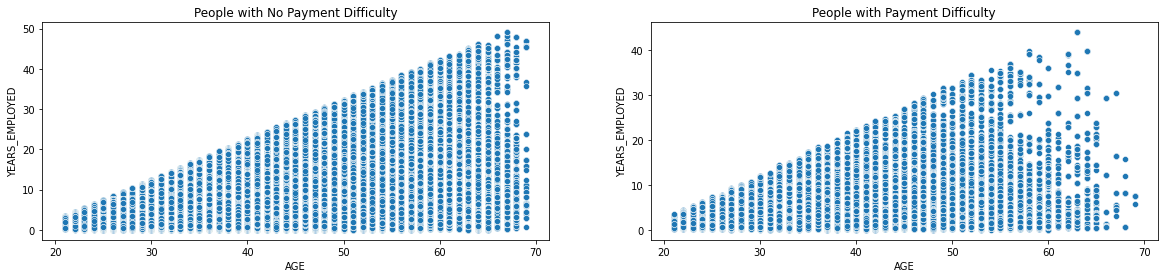

In [129]:
biPlot('AGE', 'YEARS_EMPLOYED')

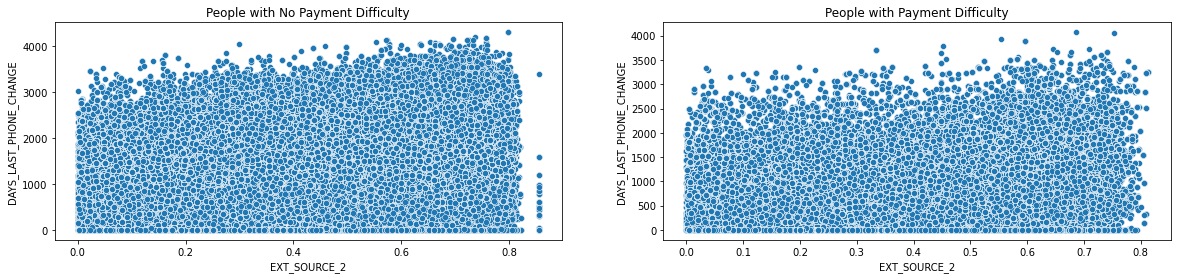

In [130]:
# EXT_SOURCE_2, DAYS_LAST_PHONE_CHANGE
biPlot('EXT_SOURCE_2', 'DAYS_LAST_PHONE_CHANGE')

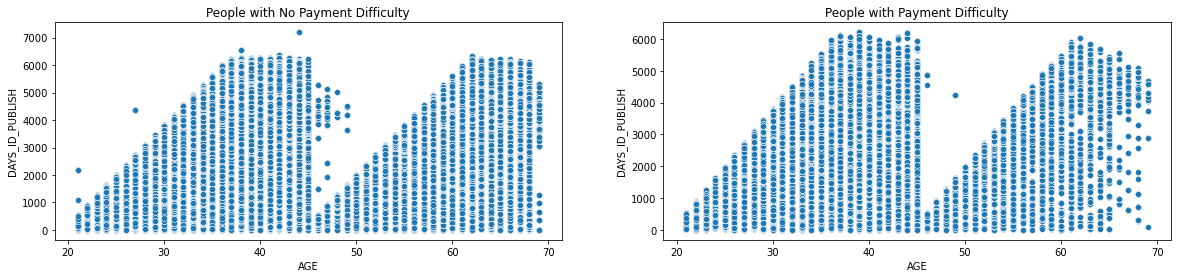

In [131]:
#Age vs DAYS_ID_PUBLISH
biPlot('AGE', 'DAYS_ID_PUBLISH')